

```
# Ce texte est au format code
```

# Importation Librairies

In [ ]:
import pandas as pd 
from google.colab import drive
drive.mount("/content/drive")
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.collections as clt
import numpy as np
from pandas_profiling import ProfileReport
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn import model_selection
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn import cluster
from sklearn import metrics
from sklearn import decomposition
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import fetch_olivetti_faces
from sklearn import (manifold, datasets, ensemble,discriminant_analysis, random_projection)
from matplotlib import offsetbox
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm
from sklearn.manifold import TSNE
!pip install pca
from pca import pca
import plotly.express as px
import plotly.io as pio
!pip install geobr
import geobr
import plotly.graph_objects as go
from sklearn.cluster import DBSCAN
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from datetime import datetime
from sklearn.neighbors import NearestNeighbors
from scipy.stats import bartlett
from scipy.stats import shapiro
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
!pip install imbalanced-learn
import imblearn
import collections
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, StratifiedKFold
import pandas as pd
!pip install dash
from dash import Dash, html, dcc
import plotly.express as px

Mounted at /content/drive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=81a227cc777594c5cb10a4288c527fa202a7fc8be6fc6712e37b816d9688e6de
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 928 kB 7.7 MB/s 
     |████████████████████████████████| 6.3 MB 44.7 MB/s 
     |████████████████████████████████| 16.7 MB 320 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.8 MB 5.2 MB/s 
     |████████████████████████████████| 357 kB 54.2 MB/s 


#Importation Donnees

In [ ]:
def importCSV(csvName):
  path='/content/drive/MyDrive/Data/' + csvName
  datasetName = pd.read_csv(path,sep=',') 
  pd.set_option('display.max_columns', None)
  return datasetName

In [ ]:
dfApplicationTest = importCSV('application_test.csv')
dfApplicationTrain = importCSV('application_train.csv')
dfBureau = importCSV('bureau.csv')
dfBureauBalance = importCSV('bureau_balance.csv')
dfCreditCardBalance = importCSV('credit_card_balance.csv')
#dfHomeCreditColumnsDescription = importCSV('HomeCredit_columns_description.csv')
dfInstallmentsPayments = importCSV('installments_payments.csv')
dfPOSCASHBalance = importCSV('POS_CASH_balance.csv')
dfPreviousApplication = importCSV('previous_application.csv')
dfSampleSubmission = importCSV('sample_submission.csv')

#Sauvegarde donnees


In [ ]:
def savePickle(csvNames):
  for cle,valeur in csvNames.items():
    model_save_name = cle + '.pkl'
    pickle.dump(valeur, open('/content/drive/MyDrive/Data/{}'.format(model_save_name),'wb'))

In [ ]:
csvNames = {
  "dfApplicationTest": dfApplicationTest,
  "dfApplicationTrain": dfApplicationTrain,
  "dfBureau": dfBureau,  
  "dfBureauBalance": dfBureauBalance,  
  "dfCreditCardBalance": dfCreditCardBalance,  
  "dfInstallmentsPayments": dfInstallmentsPayments,  
  "dfPOSCASHBalance": dfPOSCASHBalance,  
  "dfPreviousApplication": dfPreviousApplication,  
  "dfSampleSubmission": dfSampleSubmission,  
}
savePickle(csvNames)

#Chargemnent Data

In [ ]:
def LoadPickle(csvNames):
  model_load_name = csvNames + '.pkl'
  return pickle.load( open('/content/drive/MyDrive/Data/{}'.format(model_load_name),'rb'))

In [ ]:
280065 in dfImpute["ID"].values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """Entry point for launching an IPython kernel.


False

In [ ]:
dfImpute

,TARGET,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,POS_MONTHS_BALANCE_MEAN,DAYS_EMPLOYED_PERC,ANNUITY_INCOME_PERC,POS_MONTHS_BALANCE_MAX,INCOME_CREDIT_PERC,POS_MONTHS_BALANCE_SIZE,INCOME_PER_PERSON,PREV_DAYS_DECISION_MAX,INSTAL_DBD_MEAN,ID
0,1.0,0.0,406597.5,24700.5,351000.0,0.018801,-9461.0,-637.0,-3648.0,-2120.0,...,-14.500000,0.067329,0.121978,-13.0,0.498036,2.0,202500.0,-476.4,18.500000,100002
1,0.0,0.0,1293502.5,35698.5,1129500.0,0.003541,-16765.0,-1188.0,-1186.0,-291.0,...,-46.000000,0.070862,0.132217,-23.0,0.208736,6.0,135000.0,-908.4,6.100000,100003
2,0.0,0.0,135000.0,6750.0,135000.0,0.010032,-19046.0,-225.0,-4260.0,-2531.0,...,-25.000000,0.011814,0.100000,-25.0,0.500000,1.0,67500.0,-985.6,9.000000,100004
3,0.0,0.0,312682.5,29686.5,297000.0,0.008019,-19005.0,-3039.0,-9833.0,-2437.0,...,-16.000000,0.159905,0.219900,-14.0,0.431748,2.0,67500.0,-181.0,29.000000,100006
4,0.0,0.0,513000.0,21865.5,513000.0,0.028663,-19932.0,-3038.0,-4311.0,-3458.0,...,-23.071429,0.152418,0.179963,-3.0,0.236842,14.0,121500.0,-865.0,3.466667,100007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155332,0.0,0.0,900000.0,38133.0,900000.0,0.020713,-20818.0,365243.0,-10879.0,-4333.0,...,-14.000000,0.012132,0.242114,-14.0,0.175000,1.0,78750.0,-447.0,12.457143,280065
155333,1.0,0.0,748651.5,59278.5,639000.0,0.011657,-9636.0,-1462.0,-272.0,-1456.0,...,-4.000000,0.151723,0.219550,-4.0,0.360648,1.0,270000.0,-845.8,9.486424,280066
155334,0.0,1.0,294322.5,15367.5,243000.0,0.016612,-10717.0,-1564.0,-4968.0,-2905.0,...,-19.698718,0.145936,0.170750,-13.2,0.305787,7.2,30000.0,-664.4,12.758333,280067
155335,0.0,0.0,787131.0,26145.0,679500.0,0.024610,-21248.0,-776.0,-5437.0,-4793.0,...,-24.363636,0.036521,0.129111,-7.0,0.257263,11.0,101250.0,-2023.0,10.036891,280068


In [ ]:
pickle.dump(dfImpute, open('/content/drive/MyDrive/Data/dfImputeID.pkl','wb'))

In [ ]:
dfApplicationTest=LoadPickle("dfApplicationTest")
dfApplicationTrain=LoadPickle("dfApplicationTrain")
dfBureau=LoadPickle("dfBureau")
dfBureauBalance=LoadPickle("dfBureauBalance")
dfCreditCardBalance=LoadPickle("dfCreditCardBalance")
dfInstallmentsPayments=LoadPickle("dfInstallmentsPayments")
dfPOSCASHBalance=LoadPickle("dfPOSCASHBalance")
dfPreviousApplication=LoadPickle("dfPreviousApplication")
dfSampleSubmission=LoadPickle("dfSampleSubmission")
dfImputeID=LoadPickle("dfImputeID")

In [ ]:
dfBureauBalance.isna().sum().sum()

1

In [ ]:
dfImputeID

,TARGET,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,POS_MONTHS_BALANCE_MEAN,DAYS_EMPLOYED_PERC,ANNUITY_INCOME_PERC,POS_MONTHS_BALANCE_MAX,INCOME_CREDIT_PERC,POS_MONTHS_BALANCE_SIZE,INCOME_PER_PERSON,PREV_DAYS_DECISION_MAX,INSTAL_DBD_MEAN,ID
0,1.0,0.0,406597.5,24700.5,351000.0,0.018801,-9461.0,-637.0,-3648.0,-2120.0,...,-14.500000,0.067329,0.121978,-13.0,0.498036,2.0,202500.0,-476.4,18.500000,100002
1,0.0,0.0,1293502.5,35698.5,1129500.0,0.003541,-16765.0,-1188.0,-1186.0,-291.0,...,-46.000000,0.070862,0.132217,-23.0,0.208736,6.0,135000.0,-908.4,6.100000,100003
2,0.0,0.0,135000.0,6750.0,135000.0,0.010032,-19046.0,-225.0,-4260.0,-2531.0,...,-25.000000,0.011814,0.100000,-25.0,0.500000,1.0,67500.0,-985.6,9.000000,100004
3,0.0,0.0,312682.5,29686.5,297000.0,0.008019,-19005.0,-3039.0,-9833.0,-2437.0,...,-16.000000,0.159905,0.219900,-14.0,0.431748,2.0,67500.0,-181.0,29.000000,100006
4,0.0,0.0,513000.0,21865.5,513000.0,0.028663,-19932.0,-3038.0,-4311.0,-3458.0,...,-23.071429,0.152418,0.179963,-3.0,0.236842,14.0,121500.0,-865.0,3.466667,100007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155332,0.0,0.0,900000.0,38133.0,900000.0,0.020713,-20818.0,365243.0,-10879.0,-4333.0,...,-14.000000,0.012132,0.242114,-14.0,0.175000,1.0,78750.0,-447.0,12.457143,280065
155333,1.0,0.0,748651.5,59278.5,639000.0,0.011657,-9636.0,-1462.0,-272.0,-1456.0,...,-4.000000,0.151723,0.219550,-4.0,0.360648,1.0,270000.0,-845.8,9.486424,280066
155334,0.0,1.0,294322.5,15367.5,243000.0,0.016612,-10717.0,-1564.0,-4968.0,-2905.0,...,-19.698718,0.145936,0.170750,-13.2,0.305787,7.2,30000.0,-664.4,12.758333,280067
155335,0.0,0.0,787131.0,26145.0,679500.0,0.024610,-21248.0,-776.0,-5437.0,-4793.0,...,-24.363636,0.036521,0.129111,-7.0,0.257263,11.0,101250.0,-2023.0,10.036891,280068


In [ ]:
dfApplicationTest

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


#Traitement data


In [ ]:
dfInstallmentsPayments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1321786 entries, 0 to 1321785
Data columns (total 8 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_PREV              1321786 non-null  int64  
 1   SK_ID_CURR              1321786 non-null  int64  
 2   NUM_INSTALMENT_VERSION  1321786 non-null  float64
 3   NUM_INSTALMENT_NUMBER   1321786 non-null  int64  
 4   DAYS_INSTALMENT         1321786 non-null  float64
 5   DAYS_ENTRY_PAYMENT      1321786 non-null  float64
 6   AMT_INSTALMENT          1321786 non-null  float64
 7   AMT_PAYMENT             1321786 non-null  float64
dtypes: float64(5), int64(3)
memory usage: 80.7 MB


In [ ]:
dfApplicationTest.isnull().sum()

SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     6049
AMT_REQ_CREDIT_BUREAU_WEEK    6049
AMT_REQ_CREDIT_BUREAU_MON     6049
AMT_REQ_CREDIT_BUREAU_QRT     6049
AMT_REQ_CREDIT_BUREAU_YEAR    6049
Length: 121, dtype: int64

In [ ]:
dfApplicationTrain[['FLOORSMAX_AVG', 'FLOORSMAX_MEDI','FLOORSMAX_MODE']].isnull().sum()

FLOORSMAX_AVG     77488
FLOORSMAX_MEDI    77488
FLOORSMAX_MODE    77488
dtype: int64

In [ ]:
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
dfApplicationTrain.FLOORSMAX_AVG=imp_median.fit_transform(dfApplicationTrain.FLOORSMAX_AVG.values.reshape(-1,1))[:,0]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


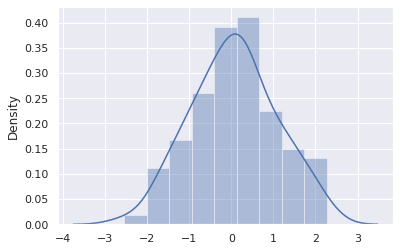

In [ ]:
x =dfApplicationTrain['FLOORSMAX_AVG']
sns.set_theme(); np.random.seed(0)
x = np.random.randn(100)
ax = sns.distplot(x)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


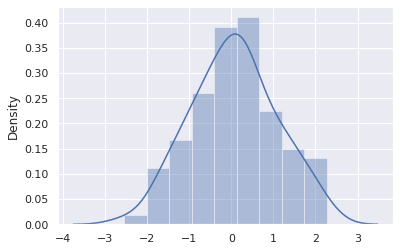

In [ ]:
x =dfApplicationTrain['FLOORSMAX_MEDI']
sns.set_theme(); np.random.seed(0)
x = np.random.randn(100)
ax = sns.distplot(x)

In [ ]:
dfInstallmentsPayments[dfInstallmentsPayments["DAYS_INSTALMENT"]!=dfInstallmentsPayments["DAYS_ENTRY_PAYMENT"]]

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585
5,1137312,164489,1.0,12,-1384.0,-1417.0,5970.375,5970.375
6,2234264,184693,4.0,11,-349.0,-352.0,29432.295,29432.295
...,...,...,...,...,...,...,...,...
1321780,1911340,122923,0.0,3,-908.0,-919.0,6848.685,6848.685
1321782,1006815,115559,1.0,4,-343.0,-341.0,7456.635,6831.540
1321783,1811220,182692,3.0,17,-497.0,-526.0,143430.615,143430.615
1321784,2825046,119742,1.0,3,-1836.0,-1862.0,4612.545,4612.545


In [ ]:
dfInstallmentsPayments["retard"]=dfInstallmentsPayments.DAYS_INSTALMENT-dfInstallmentsPayments.DAYS_ENTRY_PAYMENT

In [ ]:
dfwork=dfInstallmentsPayments.groupby("SK_ID_CURR")["retard"].max()

In [ ]:
dfwork.reset_index()

,SK_ID_CURR,retard
0,100002,24.0
1,100003,13.0
2,100004,9.0
3,100005,30.0
4,100006,77.0
...,...,...
93610,199994,9.0
93611,199995,1.0
93612,199997,36.0
93613,199998,30.0


In [ ]:
dfwork2= pd.merge(dfApplicationTest, dfwork, on =["SK_ID_CURR","SK_ID_CURR"], how='left')

In [ ]:
dfwork2

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,...,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,retard
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,...,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,30.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0,35.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,-13976,-1866,-2000.0,-4208,NaN,1,1,0,1,1,0,Sales staff,4.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Business Entity Type 3,...,0.3739,0.0388,0.0817,reg oper account,block of flats,0.3700,Panel,No,0.0,0.0,0.0,0.0,-1805.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,19.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010032,-13040,-2191,-4000.0,-4262,16.0,1,1,1,1,0,0,NaN,3.0,2,2,FRIDAY,5,0,0,0,0,1,1,Business Entity Type 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-821.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.002042,-19970,-5169,-9094.0,-3399,NaN,1,1,1,1,1,0,NaN,1.0,3,3,WEDNESDAY,16,0,0,0,0,0,0,Other,...,NaN,NaN,NaN,NaN,NaN,NaN

In [ ]:
dfwork2["Target"]=0

In [ ]:
#dfwork2[dfwork2.retard>30]["Target"]=1

dfwork2.loc[dfwork2.retard>30, "Target"]=1

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,...,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,retard,Target
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,...,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,30.0,0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0,35.0,1
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,-13976,-1866,-2000.0,-4208,NaN,1,1,0,1,1,0,Sales staff,4.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Business Entity Type 3,...,0.0388,0.0817,reg oper account,block of flats,0.3700,Panel,No,0.0,0.0,0.0,0.0,-1805.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,19.0,0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010032,-13040,-2191,-4000.0,-4262,16.0,1,1,1,1,0,0,NaN,3.0,2,2,FRIDAY,5,0,0,0,0,1,1,Business Entity Type 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-821.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,15.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.002042,-19970,-5169,-9094.0,-3399,NaN,1,1,1,1,1,0,NaN,1.0,3,3,WEDNESDAY,16,0,0,0,0,0,0,Other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,-684

In [ ]:
dfwork2["n"]=1


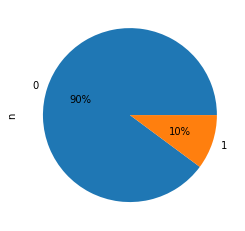

In [ ]:
dfwork2.groupby(['Target']).count().plot(
    kind='pie',  autopct='%1.0f%%',legend=None, y="n")

In [ ]:
dfApplicationTrain.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     20816
AMT_REQ_CREDIT_BUREAU_WEEK    20816
AMT_REQ_CREDIT_BUREAU_MON     20816
AMT_REQ_CREDIT_BUREAU_QRT     20816
AMT_REQ_CREDIT_BUREAU_YEAR    20816
Length: 122, dtype: int64

In [ ]:
dfApplicationTrain.iloc[:, 80:122].isnull().sum()

FLOORSMIN_MEDI                105443
LANDAREA_MEDI                  92361
LIVINGAPARTMENTS_MEDI         106274
LIVINGAREA_MEDI                78198
NONLIVINGAPARTMENTS_MEDI      107900
NONLIVINGAREA_MEDI             85916
FONDKAPREMONT_MODE            106276
HOUSETYPE_MODE                 78173
TOTALAREA_MODE                 75207
WALLSMATERIAL_MODE             79168
EMERGENCYSTATE_MODE            73848
OBS_30_CNT_SOCIAL_CIRCLE         520
DEF_30_CNT_SOCIAL_CIRCLE         520
OBS_60_CNT_SOCIAL_CIRCLE         520
DEF_60_CNT_SOCIAL_CIRCLE         520
DAYS_LAST_PHONE_CHANGE             2
FLAG_DOCUMENT_2                    1
FLAG_DOCUMENT_3                    1
FLAG_DOCUMENT_4                    1
FLAG_DOCUMENT_5                    1
FLAG_DOCUMENT_6                    1
FLAG_DOCUMENT_7                    1
FLAG_DOCUMENT_8                    1
FLAG_DOCUMENT_9                    1
FLAG_DOCUMENT_10                   1
FLAG_DOCUMENT_11                   1
FLAG_DOCUMENT_12                   1
F

In [ ]:
dfApplicationTrain[dfApplicationTrain["DAYS_BIRTH"].isnull()==1]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
155336,280069,0,Cash loans,F,N,Y,0,112500.0,9450.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfwork = dfApplicationTrain.drop(155336)

In [ ]:
dfwork.iloc[:,40:60].isnull().sum()

ORGANIZATION_TYPE                   0
EXT_SOURCE_1                        0
EXT_SOURCE_2                        0
EXT_SOURCE_3                        0
APARTMENTS_AVG                  79073
BASEMENTAREA_AVG                91087
YEARS_BEGINEXPLUATATION_AVG     75975
YEARS_BUILD_AVG                103335
COMMONAREA_AVG                 108612
ELEVATORS_AVG                   83011
ENTRANCES_AVG                   78411
FLOORSMAX_AVG                       0
FLOORSMIN_AVG                  105442
LANDAREA_AVG                    92360
LIVINGAPARTMENTS_AVG           106273
LIVINGAREA_AVG                  78197
NONLIVINGAPARTMENTS_AVG        107899
NONLIVINGAREA_AVG               85915
APARTMENTS_MODE                 79073
BASEMENTAREA_MODE               91087
dtype: int64

In [ ]:
dfApplicationTrain[dfApplicationTrain["AMT_ANNUITY"].isnull()==1]["TARGET"]

47531     0
50035     0
51594     0
55025     0
59934     0
75873     0
89343     0
123872    0
155336    0
Name: TARGET, dtype: int64

In [ ]:
dfcoor=pd.DataFrame(dfApplicationTrain).corr()[["AMT_ANNUITY"]]

In [ ]:
absAMT=abs(dfcoor)

In [ ]:
absAMT.sort_values(by='AMT_ANNUITY',ascending=False).head(5)

,AMT_ANNUITY
AMT_ANNUITY,1.000000
AMT_GOODS_PRICE,0.775792
AMT_CREDIT,0.770614
AMT_INCOME_TOTAL,0.146379
REGION_RATING_CLIENT_W_CITY,0.141180


In [ ]:
index_nan = list(dfwork['AMT_ANNUITY'][dfwork['AMT_ANNUITY'].isnull()].index)
for i in index_nan:
    feature_pred = dfwork["AMT_ANNUITY"][
        ((dfwork["AMT_GOODS_PRICE"] == dfwork.iloc[i]["AMT_GOODS_PRICE"]) &
          (dfwork["AMT_CREDIT"] == dfwork.iloc[i]["AMT_GOODS_PRICE"])
        )].median()
    feature_med = dfwork["AMT_ANNUITY"].median()
    if not np.isnan(feature_pred):
        dfwork["AMT_ANNUITY"].iloc[i] = feature_pred
    else:
        dfwork["AMT_ANNUITY"].iloc[i] = feature_med

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
col="AMT_GOODS_PRICE"
dfcoor=pd.DataFrame(dfApplicationTrain).corr()[[col]]
absAMT=abs(dfcoor)
absAMT.sort_values(by=col,ascending=False).head(5)

,AMT_GOODS_PRICE
AMT_GOODS_PRICE,1.000000
AMT_CREDIT,0.986994
AMT_ANNUITY,0.775792
EXT_SOURCE_1,0.173365
EXT_SOURCE_2,0.141492


In [ ]:
col="AMT_GOODS_PRICE"
coor1="AMT_CREDIT"
coor2="AMT_ANNUITY"
index_nan = list(dfwork[col][dfwork[col].isnull()].index)
for i in index_nan:
    feature_pred = dfwork[col][
        ((dfwork[coor1] == dfwork.iloc[i][coor1]) &
          (dfwork[coor2] == dfwork.iloc[i][coor2])
        )].median()
    feature_med = dfwork[col].median()
    if not np.isnan(feature_pred):
        dfwork[col].iloc[i] = feature_pred
    else:
        dfwork[col].iloc[i] = feature_med

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
dfwork["OCCUPATION_TYPE"]

0                      Laborers
1                    Core staff
2                      Laborers
3                      Laborers
4                    Core staff
                  ...          
155331              Sales staff
155332                 Laborers
155333            Cooking staff
155334              Sales staff
155335    High skill tech staff
Name: OCCUPATION_TYPE, Length: 155336, dtype: object

In [ ]:
dfwork2=dfwork
dfwork2["n"]=1

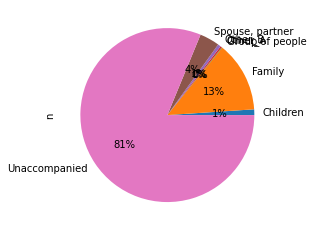

In [ ]:
dfwork2.groupby(['NAME_TYPE_SUITE']).count().plot(
    kind='pie',  autopct='%1.0f%%',legend=None, y="n")

In [ ]:
dfwork["NAME_TYPE_SUITE"].fillna(value = "Unaccompanied",inplace = True)

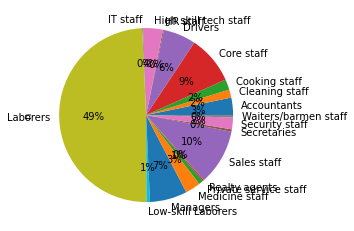

In [ ]:
dfwork2.groupby(['OCCUPATION_TYPE']).count().plot(
    kind='pie',  autopct='%1.0f%%',legend=None, y="n")

In [ ]:
dfwork.DAYS_LAST_PHONE_CHANGE=imp_median.fit_transform(dfwork.DAYS_LAST_PHONE_CHANGE.values.reshape(-1,1))[:,0]


In [ ]:
dfwork["OCCUPATION_TYPE"].fillna(value = "Laborers",inplace = True)

In [ ]:
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
dfwork.FLOORSMAX_AVG=imp_median.fit_transform(dfwork.FLOORSMAX_AVG.values.reshape(-1,1))[:,0]

In [ ]:
dfwork.EXT_SOURCE_1=imp_median.fit_transform(dfwork.EXT_SOURCE_1.values.reshape(-1,1))[:,0]
dfwork.EXT_SOURCE_2=imp_median.fit_transform(dfwork.EXT_SOURCE_2.values.reshape(-1,1))[:,0]
dfwork.EXT_SOURCE_3=imp_median.fit_transform(dfwork.EXT_SOURCE_3.values.reshape(-1,1))[:,0]
dfwork.DAYS_LAST_PHONE_CHANGE=imp_median.fit_transform(dfwork.DAYS_LAST_PHONE_CHANGE.values.reshape(-1,1))[:,0]

In [ ]:
dfwork["CAR_AGE_CAT"]="unknown"
dfwork["CAR_AGE_CAT"][(dfwork["OWN_CAR_AGE"]>=0) & (dfwork["OWN_CAR_AGE"]<11)]="new"
dfwork["CAR_AGE_CAT"][(dfwork["OWN_CAR_AGE"]>=11) & (dfwork["OWN_CAR_AGE"]<21)]="medium"
dfwork["CAR_AGE_CAT"][(dfwork["OWN_CAR_AGE"]>=21)]="old"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

In [ ]:
dfworkused=dfwork[["SK_ID_CURR","TARGET","NAME_CONTRACT_TYPE","CODE_GENDER","CNT_CHILDREN","AMT_CREDIT","AMT_ANNUITY"
,"AMT_GOODS_PRICE","NAME_TYPE_SUITE","NAME_INCOME_TYPE","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","NAME_HOUSING_TYPE","REGION_POPULATION_RELATIVE","DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","FLAG_WORK_PHONE",
"FLAG_PHONE","OCCUPATION_TYPE","REGION_RATING_CLIENT","REGION_RATING_CLIENT_W_CITY","WEEKDAY_APPR_PROCESS_START","REG_CITY_NOT_LIVE_CITY","REG_CITY_NOT_WORK_CITY","LIVE_CITY_NOT_WORK_CITY","EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3"
,"FLOORSMAX_AVG","DAYS_LAST_PHONE_CHANGE","FLAG_DOCUMENT_3","FLAG_DOCUMENT_6","FLAG_DOCUMENT_16","CAR_AGE_CAT"]]

In [ ]:
dfworkused.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
CNT_CHILDREN                   0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_WORK_PHONE                0
FLAG_PHONE                     0
OCCUPATION_TYPE                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
EXT_SOURCE_1                   0
EXT_SOURCE_2                   0
EXT_SOURCE_3                   0
FLOORSMAX_

In [ ]:
def encoder(columnname, df):
  enc = OneHotEncoder(handle_unknown='ignore')
  enc_df = pd.DataFrame(enc.fit_transform(df[[columnname]]).toarray())
  enc_df.columns = enc.get_feature_names([columnname])
  temp=df.drop([columnname], axis=1)
  return pd.concat([temp, enc_df], axis=1)

In [ ]:
test=encoder('NAME_TYPE_SUITE',dfworkused)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
test

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,FLAG_DOCUMENT_6,FLAG_DOCUMENT_16,CAR_AGE_CAT,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied
0,100002,1,Cash loans,M,0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,...,0.0,0.0,unknown,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,0,1293502.5,35698.5,1129500.0,State servant,Higher education,...,0.0,0.0,unknown,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,...,0.0,0.0,old,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,100006,0,Cash loans,F,0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,...,0.0,0.0,unknown,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,...,0.0,0.0,unknown,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155331,280064,0,Cash loans,F,0,189621.0,14980.5,144000.0,Commercial associate,Secondary / secondary special,...,0.0,0.0,unknown,0.0,0.0,0.0,0.0,0.0,0.0,1.0
155332,280065,0,Cash loans,F,0,900000.0,38133.0,900000.0,Pensioner,Secondary / secondary special,...,1.0,0.0,medium,0.0,1.0,0.0,0.0,0.0,0.0,0.0
155333,280066,1,Cash loans,M,0,748651.5,59278.5,639000.0,Commercial associate,Secondary / secondary special,...,0.0,0.0,unknown,0.0,0.0,0.0,0.0,0.0,0.0,1.0
155334,280067,0,Cash loans,F,1,294322.5,15367.5,243000.0,Working,Secondary / secondary special,...,0.0,1.0,old,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
labelencoder = LabelEncoder()
dfworkused['NAME_CONTRACT_TYPE_INT'] = labelencoder.fit_transform(dfworkused['NAME_CONTRACT_TYPE'])
dfworkused['CODE_GENDER_INT'] = labelencoder.fit_transform(dfworkused['CODE_GENDER'])

dfworkused=encoder('NAME_TYPE_SUITE',dfworkused)
dfworkused=encoder('NAME_EDUCATION_TYPE',dfworkused)
dfworkused=encoder('NAME_INCOME_TYPE',dfworkused)
dfworkused=encoder('NAME_FAMILY_STATUS',dfworkused)
dfworkused=encoder('NAME_HOUSING_TYPE',dfworkused)
dfworkused=encoder('OCCUPATION_TYPE',dfworkused)
dfworkused=encoder('CAR_AGE_CAT',dfworkused)
dfworkused=encoder('WEEKDAY_APPR_PROCESS_START',dfworkused)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_

In [ ]:
dfworku

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155336 entries, 0 to 155335
Data columns (total 36 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   155336 non-null  int64  
 1   TARGET                       155336 non-null  int64  
 2   NAME_CONTRACT_TYPE           155336 non-null  object 
 3   CODE_GENDER                  155336 non-null  object 
 4   CNT_CHILDREN                 155336 non-null  int64  
 5   AMT_CREDIT                   155336 non-null  float64
 6   AMT_ANNUITY                  155336 non-null  float64
 7   AMT_GOODS_PRICE              155336 non-null  float64
 8   NAME_TYPE_SUITE              155336 non-null  object 
 9   NAME_INCOME_TYPE             155336 non-null  object 
 10  NAME_EDUCATION_TYPE          155336 non-null  object 
 11  NAME_FAMILY_STATUS           155336 non-null  object 
 12  NAME_HOUSING_TYPE            155336 non-null  object 
 13 

In [ ]:
y = dfworkused["TARGET"]
X = dfworkused.drop(['TARGET'], axis=1)
X = X.drop(['NAME_CONTRACT_TYPE'], axis=1)
X = X.drop(['CODE_GENDER'], axis=1)
#X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                                  test_size=0.33, 
                                                  random_state=42)

In [ ]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression(multi_class='ovr', solver='liblinear')
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(multi_class='ovr',
                                          solver='liblinear'),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [ ]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l1'}
accuracy : 0.9188469870062477


In [ ]:
lm = LogisticRegression(multi_class='ovr', solver='liblinear',C=0.001,penalty='l1')
lm.fit(X_train, y_train)

LogisticRegression(C=0.001, multi_class='ovr', penalty='l1', solver='liblinear')

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.rcParams.update({'font.size': 16})
ax.set_title('Confusion Matrx')
disp =metrics.plot_confusion_matrix(lm, X_test, y_test, ax = ax, cmap=plt.cm.Blues, xticks_rotation='vertical')
disp.confusion_matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


array([[47032,     0],
       [ 4229,     0]])

In [ ]:

counter = collections.Counter(y)
print(counter)

Counter({0: 95629, 1: 95629})


In [ ]:
oversample = SMOTE()
X, y = oversample.fit_resample(X_train, y_train)

In [ ]:
  grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
  logreg=LogisticRegression(multi_class='ovr', solver='liblinear')
  logreg_cv=GridSearchCV(logreg,grid,cv=10)
  logreg_cv.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

GridSearchCV(cv=10,
             estimator=LogisticRegression(multi_class='ovr',
                                          solver='liblinear'),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [ ]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1000.0, 'penalty': 'l1'}
accuracy : 0.7219933980298523


In [ ]:
lm = LogisticRegression(multi_class='ovr', solver='liblinear',C=1000,penalty='l1')
lm.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LogisticRegression(C=1000, multi_class='ovr', penalty='l1', solver='liblinear')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


array([[33680, 13352],
       [ 1842,  2387]])

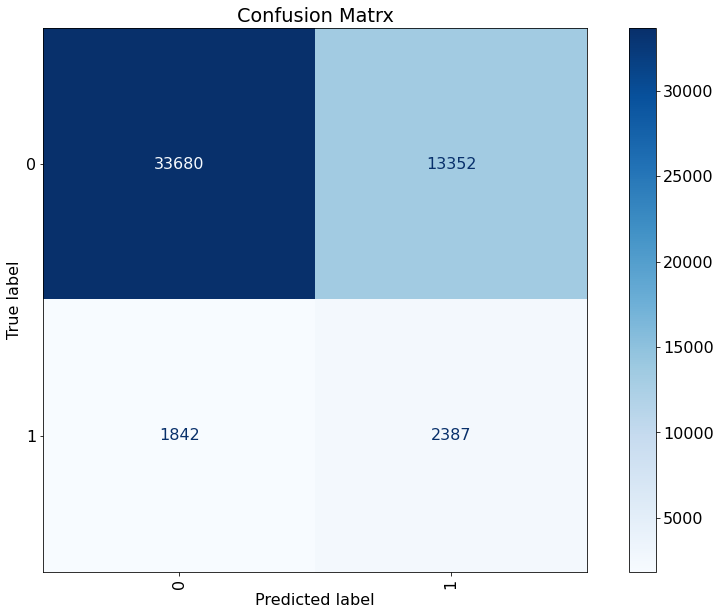

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.rcParams.update({'font.size': 16})
ax.set_title('Confusion Matrx')
disp =metrics.plot_confusion_matrix(lm, X_test, y_test, ax = ax, cmap=plt.cm.Blues, xticks_rotation='vertical')
disp.confusion_matrix

In [ ]:
y_pred=np.around(lm.predict(X_test))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.72      0.82     47032
           1       0.15      0.56      0.24      4229

    accuracy                           0.70     51261
   macro avg       0.55      0.64      0.53     51261
weighted avg       0.88      0.70      0.77     51261



In [ ]:
y_pred=np.around(lm.predict(X_test))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.72      0.82     47032
           1       0.14      0.52      0.22      4229

    accuracy                           0.70     51261
   macro avg       0.54      0.62      0.52     51261
weighted avg       0.88      0.70      0.77     51261



In [ ]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
rfc=RandomForestClassifier(random_state=42)
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X, y)
CV_rfc.best_params_

KeyboardInterrupt: ignored

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE
from matplotlib import pyplot
from numpy import where
# define dataset
oversample = BorderlineSMOTE()
X, y = oversample.fit_resample(X_train, y_train)

In [ ]:
y

0         0
1         0
2         1
3         0
4         1
         ..
191253    1
191254    1
191255    1
191256    1
191257    1
Name: TARGET, Length: 191258, dtype: int64

In [ ]:
dfwork2.groupby(['Target']).count().plot(
    kind='pie',  autopct='%1.0f%%',legend=None, y="n")

In [ ]:
  grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
  logreg=LogisticRegression(multi_class='ovr', solver='liblinear')
  logreg_cv=GridSearchCV(logreg,grid,cv=10)
  logreg_cv.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

In [ ]:
model = LogisticRegression(class_weight='balanced', multi_class='ovr', solver='liblinear',C=0.001,penalty='l1')
lm.fit(X, y)

LogisticRegression(C=0.001, multi_class='ovr', penalty='l1', solver='liblinear')

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.rcParams.update({'font.size': 16})
ax.set_title('Confusion Matrx')
disp =metrics.plot_confusion_matrix(lm, X_test, y_test, ax = ax, cmap=plt.cm.Blues, xticks_rotation='vertical')
disp.confusion_matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


array([[33634, 13398],
       [ 1871,  2358]])

In [ ]:
y_pred=np.around(lm.predict(X_test))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.72      0.82     47032
           1       0.15      0.56      0.24      4229

    accuracy                           0.70     51261
   macro avg       0.55      0.64      0.53     51261
weighted avg       0.88      0.70      0.77     51261




##traitement2

In [ ]:
import numpy as np
import pandas as pd
import gc
import time
from contextlib import contextmanager
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Train samples: 155337, test samples: 48744
Bureau df shape: (181457, 116)
Process bureau and bureau_balance - done in 6s
Previous applications df shape: (185215, 248)
Process previous_applications - done in 7s
Pos-cash balance df shape: (298597, 17)
Process POS-CASH balance - done in 3s
Installments payments df shape: (93615, 26)
Process installments payments - done in 3s
Credit card balance df shape: (93247, 141)
Process credit card balance - done in 6s
Starting LightGBM. Train shape: (155334, 796), test shape: (48744, 796)
Training until validation scores don't improve for 200 rounds.
[200]	training's binary_logloss: 0.237896	training's auc: 0.795977	valid_1's binary_logloss: 0.242655	valid_1's auc: 0.765424
[400]	training's binary_logloss: 0.227518	training's auc: 0.822238	valid_1's binary_logloss: 0.239881	valid_1's auc: 0.773684
[600]	training's binary_logloss: 0.220663	training's auc: 0.839344	valid_1's binary_logloss: 0.239264	valid_1's auc: 0.775726
[800]	training's binary_logl

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:273: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Run LightGBM with kfold - done in 5389s
Full model run - done in 5415s


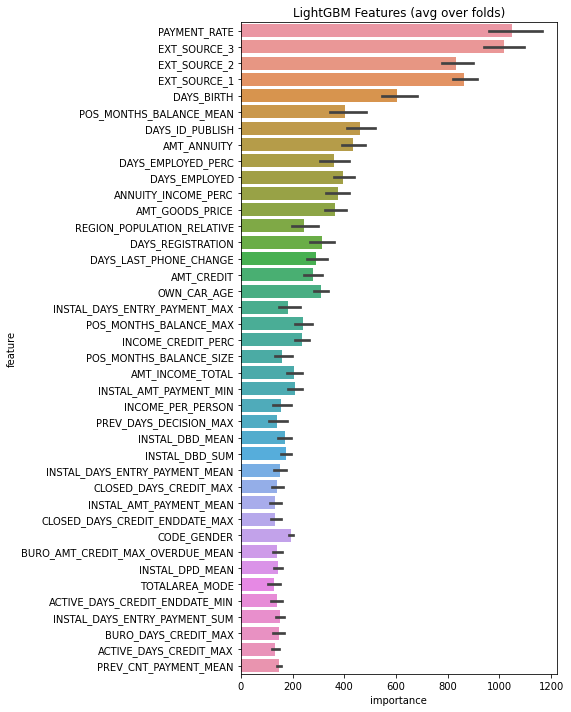

In [ ]:
@contextmanager
def timer(title):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(title, time.time() - t0))

# One-hot encoding for categorical columns with get_dummies
def one_hot_encoder(df, nan_as_category = True):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

# Preprocess application_train.csv and application_test.csv
def application_train_test(num_rows = None, nan_as_category = False):
    # Read data and merge
    df = dfApplicationTrain
    test_df = dfApplicationTest
    print("Train samples: {}, test samples: {}".format(len(df), len(test_df)))
    df = df.append(test_df).reset_index()
    # Optional: Remove 4 applications with XNA CODE_GENDER (train set)
    df = df[df['CODE_GENDER'] != 'XNA']
    
    # Categorical features with Binary encode (0 or 1; two categories)
    for bin_feature in ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']:
        df[bin_feature], uniques = pd.factorize(df[bin_feature])
    # Categorical features with One-Hot encode
    df, cat_cols = one_hot_encoder(df, nan_as_category)
    
    # NaN values for DAYS_EMPLOYED: 365.243 -> nan
    df['DAYS_EMPLOYED'].replace(365243, np.nan, inplace= True)
    # Some simple new features (percentages)
    df['DAYS_EMPLOYED_PERC'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']
    df['INCOME_CREDIT_PERC'] = df['AMT_INCOME_TOTAL'] / df['AMT_CREDIT']
    df['INCOME_PER_PERSON'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']
    df['ANNUITY_INCOME_PERC'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
    df['PAYMENT_RATE'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']
    del test_df
    gc.collect()
    return df

# Preprocess bureau.csv and bureau_balance.csv
def bureau_and_balance(num_rows = None, nan_as_category = True):
    bureau = dfBureau
    bb =dfBureauBalance
    bb, bb_cat = one_hot_encoder(bb, nan_as_category)
    bureau, bureau_cat = one_hot_encoder(bureau, nan_as_category)
    
    # Bureau balance: Perform aggregations and merge with bureau.csv
    bb_aggregations = {'MONTHS_BALANCE': ['min', 'max', 'size']}
    for col in bb_cat:
        bb_aggregations[col] = ['mean']
    bb_agg = bb.groupby('SK_ID_BUREAU').agg(bb_aggregations)
    bb_agg.columns = pd.Index([e[0] + "_" + e[1].upper() for e in bb_agg.columns.tolist()])
    bureau = bureau.join(bb_agg, how='left', on='SK_ID_BUREAU')
    bureau.drop(['SK_ID_BUREAU'], axis=1, inplace= True)
    del bb, bb_agg
    gc.collect()
    
    # Bureau and bureau_balance numeric features
    num_aggregations = {
        'DAYS_CREDIT': ['min', 'max', 'mean', 'var'],
        'DAYS_CREDIT_ENDDATE': ['min', 'max', 'mean'],
        'DAYS_CREDIT_UPDATE': ['mean'],
        'CREDIT_DAY_OVERDUE': ['max', 'mean'],
        'AMT_CREDIT_MAX_OVERDUE': ['mean'],
        'AMT_CREDIT_SUM': ['max', 'mean', 'sum'],
        'AMT_CREDIT_SUM_DEBT': ['max', 'mean', 'sum'],
        'AMT_CREDIT_SUM_OVERDUE': ['mean'],
        'AMT_CREDIT_SUM_LIMIT': ['mean', 'sum'],
        'AMT_ANNUITY': ['max', 'mean'],
        'CNT_CREDIT_PROLONG': ['sum'],
        'MONTHS_BALANCE_MIN': ['min'],
        'MONTHS_BALANCE_MAX': ['max'],
        'MONTHS_BALANCE_SIZE': ['mean', 'sum']
    }
    # Bureau and bureau_balance categorical features
    cat_aggregations = {}
    for cat in bureau_cat: cat_aggregations[cat] = ['mean']
    for cat in bb_cat: cat_aggregations[cat + "_MEAN"] = ['mean']
    
    bureau_agg = bureau.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
    bureau_agg.columns = pd.Index(['BURO_' + e[0] + "_" + e[1].upper() for e in bureau_agg.columns.tolist()])
    # Bureau: Active credits - using only numerical aggregations
    active = bureau[bureau['CREDIT_ACTIVE_Active'] == 1]
    active_agg = active.groupby('SK_ID_CURR').agg(num_aggregations)
    active_agg.columns = pd.Index(['ACTIVE_' + e[0] + "_" + e[1].upper() for e in active_agg.columns.tolist()])
    bureau_agg = bureau_agg.join(active_agg, how='left', on='SK_ID_CURR')
    del active, active_agg
    gc.collect()
    # Bureau: Closed credits - using only numerical aggregations
    closed = bureau[bureau['CREDIT_ACTIVE_Closed'] == 1]
    closed_agg = closed.groupby('SK_ID_CURR').agg(num_aggregations)
    closed_agg.columns = pd.Index(['CLOSED_' + e[0] + "_" + e[1].upper() for e in closed_agg.columns.tolist()])
    bureau_agg = bureau_agg.join(closed_agg, how='left', on='SK_ID_CURR')
    del closed, closed_agg, bureau
    gc.collect()
    return bureau_agg

# Preprocess previous_applications.csv
def previous_applications(num_rows = None, nan_as_category = True):
    prev = dfPreviousApplication
    prev, cat_cols = one_hot_encoder(prev, nan_as_category= True)
    # Days 365.243 values -> nan
    prev['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace= True)
    prev['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace= True)
    prev['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace= True)
    prev['DAYS_LAST_DUE'].replace(365243, np.nan, inplace= True)
    prev['DAYS_TERMINATION'].replace(365243, np.nan, inplace= True)
    # Add feature: value ask / value received percentage
    prev['APP_CREDIT_PERC'] = prev['AMT_APPLICATION'] / prev['AMT_CREDIT']
    # Previous applications numeric features
    num_aggregations = {
        'AMT_ANNUITY': ['min', 'max', 'mean'],
        'AMT_APPLICATION': ['min', 'max', 'mean'],
        'AMT_CREDIT': ['min', 'max', 'mean'],
        'APP_CREDIT_PERC': ['min', 'max', 'mean', 'var'],
        'AMT_DOWN_PAYMENT': ['min', 'max', 'mean'],
        'AMT_GOODS_PRICE': ['min', 'max', 'mean'],
        'HOUR_APPR_PROCESS_START': ['min', 'max', 'mean'],
        'RATE_DOWN_PAYMENT': ['min', 'max', 'mean'],
        'DAYS_DECISION': ['min', 'max', 'mean'],
        'CNT_PAYMENT': ['mean', 'sum'],
    }
    # Previous applications categorical features
    cat_aggregations = {}
    for cat in cat_cols:
        cat_aggregations[cat] = ['mean']
    
    prev_agg = prev.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
    prev_agg.columns = pd.Index(['PREV_' + e[0] + "_" + e[1].upper() for e in prev_agg.columns.tolist()])
    # Previous Applications: Approved Applications - only numerical features
    approved = prev[prev['NAME_CONTRACT_STATUS_Approved'] == 1]
    approved_agg = approved.groupby('SK_ID_CURR').agg(num_aggregations)
    approved_agg.columns = pd.Index(['APPROVED_' + e[0] + "_" + e[1].upper() for e in approved_agg.columns.tolist()])
    prev_agg = prev_agg.join(approved_agg, how='left', on='SK_ID_CURR')
    # Previous Applications: Refused Applications - only numerical features
    refused = prev[prev['NAME_CONTRACT_STATUS_Refused'] == 1]
    refused_agg = refused.groupby('SK_ID_CURR').agg(num_aggregations)
    refused_agg.columns = pd.Index(['REFUSED_' + e[0] + "_" + e[1].upper() for e in refused_agg.columns.tolist()])
    prev_agg = prev_agg.join(refused_agg, how='left', on='SK_ID_CURR')
    del refused, refused_agg, approved, approved_agg, prev
    gc.collect()
    return prev_agg

# Preprocess POS_CASH_balance.csv
def pos_cash(num_rows = None, nan_as_category = True):
    pos = dfPOSCASHBalance
    pos, cat_cols = one_hot_encoder(pos, nan_as_category= True)
    # Features
    aggregations = {
        'MONTHS_BALANCE': ['max', 'mean', 'size'],
        'SK_DPD': ['max', 'mean'],
        'SK_DPD_DEF': ['max', 'mean']
    }
    for cat in cat_cols:
        aggregations[cat] = ['mean']
    
    pos_agg = pos.groupby('SK_ID_CURR').agg(aggregations)
    pos_agg.columns = pd.Index(['POS_' + e[0] + "_" + e[1].upper() for e in pos_agg.columns.tolist()])
    # Count pos cash accounts
    pos_agg['POS_COUNT'] = pos.groupby('SK_ID_CURR').size()
    del pos
    gc.collect()
    return pos_agg
    
# Preprocess installments_payments.csv
def installments_payments(num_rows = None, nan_as_category = True):
    ins = dfInstallmentsPayments
    ins, cat_cols = one_hot_encoder(ins, nan_as_category= True)
    # Percentage and difference paid in each installment (amount paid and installment value)
    ins['PAYMENT_PERC'] = ins['AMT_PAYMENT'] / ins['AMT_INSTALMENT']
    ins['PAYMENT_DIFF'] = ins['AMT_INSTALMENT'] - ins['AMT_PAYMENT']
    # Days past due and days before due (no negative values)
    ins['DPD'] = ins['DAYS_ENTRY_PAYMENT'] - ins['DAYS_INSTALMENT']
    ins['DBD'] = ins['DAYS_INSTALMENT'] - ins['DAYS_ENTRY_PAYMENT']
    ins['DPD'] = ins['DPD'].apply(lambda x: x if x > 0 else 0)
    ins['DBD'] = ins['DBD'].apply(lambda x: x if x > 0 else 0)
    # Features: Perform aggregations
    aggregations = {
        'NUM_INSTALMENT_VERSION': ['nunique'],
        'DPD': ['max', 'mean', 'sum'],
        'DBD': ['max', 'mean', 'sum'],
        'PAYMENT_PERC': ['max', 'mean', 'sum', 'var'],
        'PAYMENT_DIFF': ['max', 'mean', 'sum', 'var'],
        'AMT_INSTALMENT': ['max', 'mean', 'sum'],
        'AMT_PAYMENT': ['min', 'max', 'mean', 'sum'],
        'DAYS_ENTRY_PAYMENT': ['max', 'mean', 'sum']
    }
    for cat in cat_cols:
        aggregations[cat] = ['mean']
    ins_agg = ins.groupby('SK_ID_CURR').agg(aggregations)
    ins_agg.columns = pd.Index(['INSTAL_' + e[0] + "_" + e[1].upper() for e in ins_agg.columns.tolist()])
    # Count installments accounts
    ins_agg['INSTAL_COUNT'] = ins.groupby('SK_ID_CURR').size()
    del ins
    gc.collect()
    return ins_agg

# Preprocess credit_card_balance.csv
def credit_card_balance(num_rows = None, nan_as_category = True):
    cc = dfCreditCardBalance
    cc, cat_cols = one_hot_encoder(cc, nan_as_category= True)
    # General aggregations
    cc.drop(['SK_ID_PREV'], axis= 1, inplace = True)
    cc_agg = cc.groupby('SK_ID_CURR').agg(['min', 'max', 'mean', 'sum', 'var'])
    cc_agg.columns = pd.Index(['CC_' + e[0] + "_" + e[1].upper() for e in cc_agg.columns.tolist()])
    # Count credit card lines
    cc_agg['CC_COUNT'] = cc.groupby('SK_ID_CURR').size()
    del cc
    gc.collect()
    return cc_agg

# LightGBM GBDT with KFold or Stratified KFold
# Parameters from Tilii kernel: https://www.kaggle.com/tilii7/olivier-lightgbm-parameters-by-bayesian-opt/code
def kfold_lightgbm(df, num_folds, stratified = False, debug= False):
    # Divide in training/validation and test data
    train_df = df[df['TARGET'].notnull()]
    test_df = df[df['TARGET'].isnull()]
    print("Starting LightGBM. Train shape: {}, test shape: {}".format(train_df.shape, test_df.shape))
    del df
    gc.collect()
    # Cross validation model
    if stratified:
        folds = StratifiedKFold(n_splits= num_folds, shuffle=True, random_state=1001)
    else:
        folds = KFold(n_splits= num_folds, shuffle=True, random_state=1001)
    # Create arrays and dataframes to store results
    oof_preds = np.zeros(train_df.shape[0])
    sub_preds = np.zeros(test_df.shape[0])
    feature_importance_df = pd.DataFrame()
    feats = [f for f in train_df.columns if f not in ['TARGET','SK_ID_CURR','SK_ID_BUREAU','SK_ID_PREV','index']]
    
    for n_fold, (train_idx, valid_idx) in enumerate(folds.split(train_df[feats], train_df['TARGET'])):
        train_x, train_y = train_df[feats].iloc[train_idx], train_df['TARGET'].iloc[train_idx]
        valid_x, valid_y = train_df[feats].iloc[valid_idx], train_df['TARGET'].iloc[valid_idx]

        # LightGBM parameters found by Bayesian optimization
        clf = LGBMClassifier(
            nthread=4,
            n_estimators=10000,
            learning_rate=0.02,
            num_leaves=34,
            colsample_bytree=0.9497036,
            subsample=0.8715623,
            max_depth=8,
            reg_alpha=0.041545473,
            reg_lambda=0.0735294,
            min_split_gain=0.0222415,
            min_child_weight=39.3259775,
            silent=-1,
            verbose=-1, )

        clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], 
            eval_metric= 'auc', verbose= 200, early_stopping_rounds= 200)

        oof_preds[valid_idx] = clf.predict_proba(valid_x, num_iteration=clf.best_iteration_)[:, 1]
        sub_preds += clf.predict_proba(test_df[feats], num_iteration=clf.best_iteration_)[:, 1] / folds.n_splits

        fold_importance_df = pd.DataFrame()
        fold_importance_df["feature"] = feats
        fold_importance_df["importance"] = clf.feature_importances_
        fold_importance_df["fold"] = n_fold + 1
        feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
        print('Fold %2d AUC : %.6f' % (n_fold + 1, roc_auc_score(valid_y, oof_preds[valid_idx])))
        del clf, train_x, train_y, valid_x, valid_y
        gc.collect()

    print('Full AUC score %.6f' % roc_auc_score(train_df['TARGET'], oof_preds))
    # Write submission file and plot feature importance
    if not debug:
        test_df['TARGET'] = sub_preds
        test_df[['SK_ID_CURR', 'TARGET']].to_csv(submission_file_name, index= False)
    display_importances(feature_importance_df)
    return feature_importance_df

# Display/plot feature importance
def display_importances(feature_importance_df_):
    cols = feature_importance_df_[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)[:40].index
    best_features = feature_importance_df_.loc[feature_importance_df_.feature.isin(cols)]
    plt.figure(figsize=(8, 10))
    sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    plt.savefig('lgbm_importances01.png')


def main(debug = False):
    num_rows = 10000 if debug else None
    df = application_train_test(num_rows)
    with timer("Process bureau and bureau_balance"):
        bureau = bureau_and_balance(num_rows)
        print("Bureau df shape:", bureau.shape)
        df = df.join(bureau, how='left', on='SK_ID_CURR')
        del bureau
        gc.collect()
    with timer("Process previous_applications"):
        prev = previous_applications(num_rows)
        print("Previous applications df shape:", prev.shape)
        df = df.join(prev, how='left', on='SK_ID_CURR')
        del prev
        gc.collect()
    with timer("Process POS-CASH balance"):
        pos = pos_cash(num_rows)
        print("Pos-cash balance df shape:", pos.shape)
        df = df.join(pos, how='left', on='SK_ID_CURR')
        del pos
        gc.collect()
    with timer("Process installments payments"):
        ins = installments_payments(num_rows)
        print("Installments payments df shape:", ins.shape)
        df = df.join(ins, how='left', on='SK_ID_CURR')
        del ins
        gc.collect()
    with timer("Process credit card balance"):
        cc = credit_card_balance(num_rows)
        print("Credit card balance df shape:", cc.shape)
        df = df.join(cc, how='left', on='SK_ID_CURR')
        del cc
        gc.collect()
    with timer("Run LightGBM with kfold"):
        feat_importance = kfold_lightgbm(df, num_folds= 10, stratified= False, debug= debug)

if __name__ == "__main__":
    submission_file_name = "submission_kernel02.csv"
    with timer("Full model run"):
        main()

In [ ]:
model_save_name = 'dfFinal.pkl'
pickle.dump(df, open('/content/drive/MyDrive/Data/{}'.format(model_save_name),'wb'))

NameError: ignored

Train samples: 155337, test samples: 48744
Bureau df shape: (181457, 116)
Process bureau and bureau_balance - done in 12s
Previous applications df shape: (185215, 248)
Process previous_applications - done in 13s
Pos-cash balance df shape: (298597, 17)
Process POS-CASH balance - done in 7s
Installments payments df shape: (93615, 26)
Process installments payments - done in 6s
Credit card balance df shape: (93247, 141)
Process credit card balance - done in 9s
Run LightGBM with kfold - done in 10s
Full model run - done in 60s


In [ ]:
dfexample=LoadPickle("dfFinal")

In [ ]:
dfval=dfFinal[dfFinal['TARGET'].notnull()]

In [ ]:
dfval.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155334 entries, 0 to 155336
Columns: 796 entries, index to CC_COUNT
dtypes: float64(657), int64(6), uint8(133)
memory usage: 806.6 MB


In [ ]:

dfval.corr()

In [ ]:
dfval.iloc[:, 0:40].isnull().sum()

index                               0
SK_ID_CURR                          0
TARGET                              0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                         9
AMT_GOODS_PRICE                   131
REGION_POPULATION_RELATIVE          1
DAYS_BIRTH                          1
DAYS_EMPLOYED                   27836
DAYS_REGISTRATION                   1
DAYS_ID_PUBLISH                     1
OWN_CAR_AGE                    102586
FLAG_MOBIL                          1
FLAG_EMP_PHONE                      1
FLAG_WORK_PHONE                     1
FLAG_CONT_MOBILE                    1
FLAG_PHONE                          1
FLAG_EMAIL                          1
CNT_FAM_MEMBERS                     2
REGION_RATING_CLIENT                1
REGION_RATING_CLIENT_W_CITY         1
HOUR_APPR_PR

missing values

In [ ]:
dfcoor=dfval.corr()

In [ ]:
col="AMT_GOODS_PRICE"
dfcoor=dfcoor[[col]]
absAMT=abs(dfcoor)
absAMT.sort_values(by=col,ascending=False).head(5)

,AMT_GOODS_PRICE
AMT_GOODS_PRICE,1.000000
AMT_CREDIT,0.986994
AMT_ANNUITY,0.775790
PAYMENT_RATE,0.533132
ANNUITY_INCOME_PERC,0.368377


In [ ]:
col="AMT_GOODS_PRICE"
coor1="AMT_CREDIT"
coor2="AMT_ANNUITY"
index_nan = list(dfval[col][dfval[col].isnull()].index)
for i in index_nan:
    feature_pred = dfval[col][
        ((dfval[coor1] == dfval.iloc[i][coor1]) &
          (dfval[coor2] == dfval.iloc[i][coor2])
        )].median()
    feature_med = dfval[col].median()
    if not np.isnan(feature_pred):
        dfval[col].iloc[i] = feature_pred
    else:
        dfval[col].iloc[i] = feature_med

# traitement 3

In [ ]:
dfFinal = dfApplicationTest.append(dfApplicationTrain).reset_index()
corelations = dfFinal.corr()['TARGET'].sort_values()
high_corelation = corelations.tail(15)
low_corelations =  corelations.head(15)

print('Plus grandes coorélations positives :\n', high_corelation)
print('Plus grandes corrélations négatives :\n', low_corelations)

Plus grandes coorélations positives :
 DEF_30_CNT_SOCIAL_CIRCLE       0.031754
DEF_60_CNT_SOCIAL_CIRCLE       0.033064
LIVE_CITY_NOT_WORK_CITY        0.034475
DAYS_REGISTRATION              0.039755
REG_CITY_NOT_LIVE_CITY         0.040518
OWN_CAR_AGE                    0.042197
FLAG_DOCUMENT_3                0.044433
FLAG_EMP_PHONE                 0.045059
REG_CITY_NOT_WORK_CITY         0.051243
DAYS_ID_PUBLISH                0.052487
DAYS_LAST_PHONE_CHANGE         0.055517
REGION_RATING_CLIENT           0.060947
REGION_RATING_CLIENT_W_CITY    0.062322
DAYS_BIRTH                     0.079086
TARGET                         1.000000
Name: TARGET, dtype: float64
Plus grandes corrélations négatives :
 EXT_SOURCE_3                 -0.177216
EXT_SOURCE_2                 -0.162612
EXT_SOURCE_1                 -0.154798
FLOORSMAX_AVG                -0.047751
FLOORSMAX_MEDI               -0.047545
FLOORSMAX_MODE               -0.046524
DAYS_EMPLOYED                -0.044046
FLOORSMIN_AVG       

Text(0.5, 1.0, 'Tableau de corrélation les plus fortes avec Target')

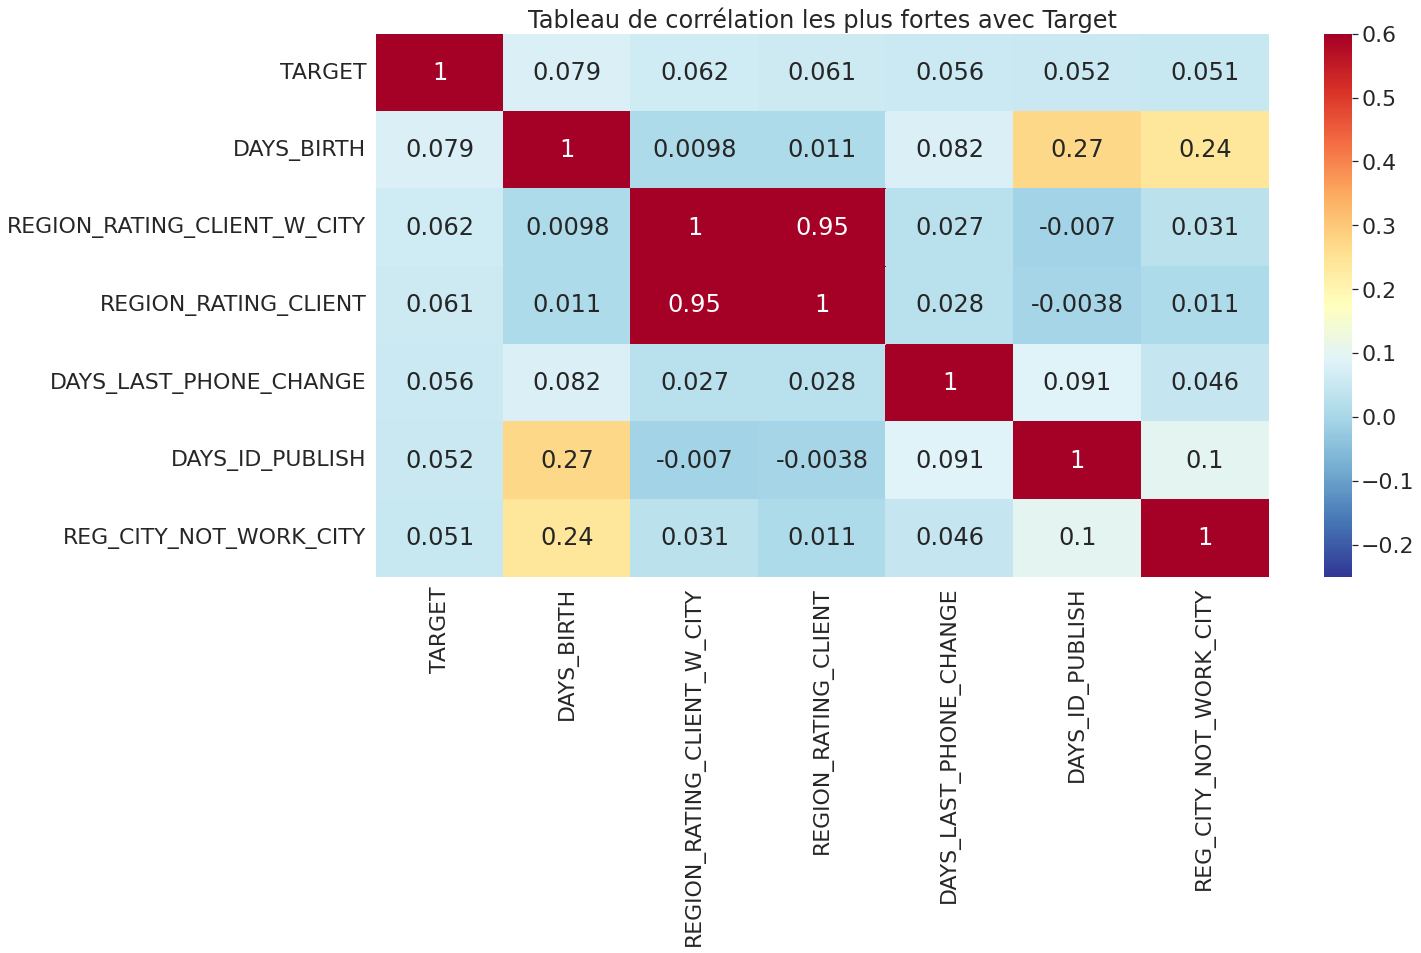

In [ ]:
most_corr=dfApplicationTrain[['TARGET','DAYS_BIRTH',
                      'REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT','DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH','REG_CITY_NOT_WORK_CITY']]
most_corr_corr = most_corr.corr()

sns.set_style("dark")
sns.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 1.0})
fig, axes = plt.subplots(figsize = (20,10),sharey=True)
sns.heatmap(most_corr_corr,cmap=plt.cm.RdYlBu_r,vmin=-0.25,vmax=0.6,annot=True)
plt.title('Tableau de corrélation les plus fortes avec Target')

Text(0.5, 1.0, 'Tableau de corrélation les plus fortes négativement avec Target')

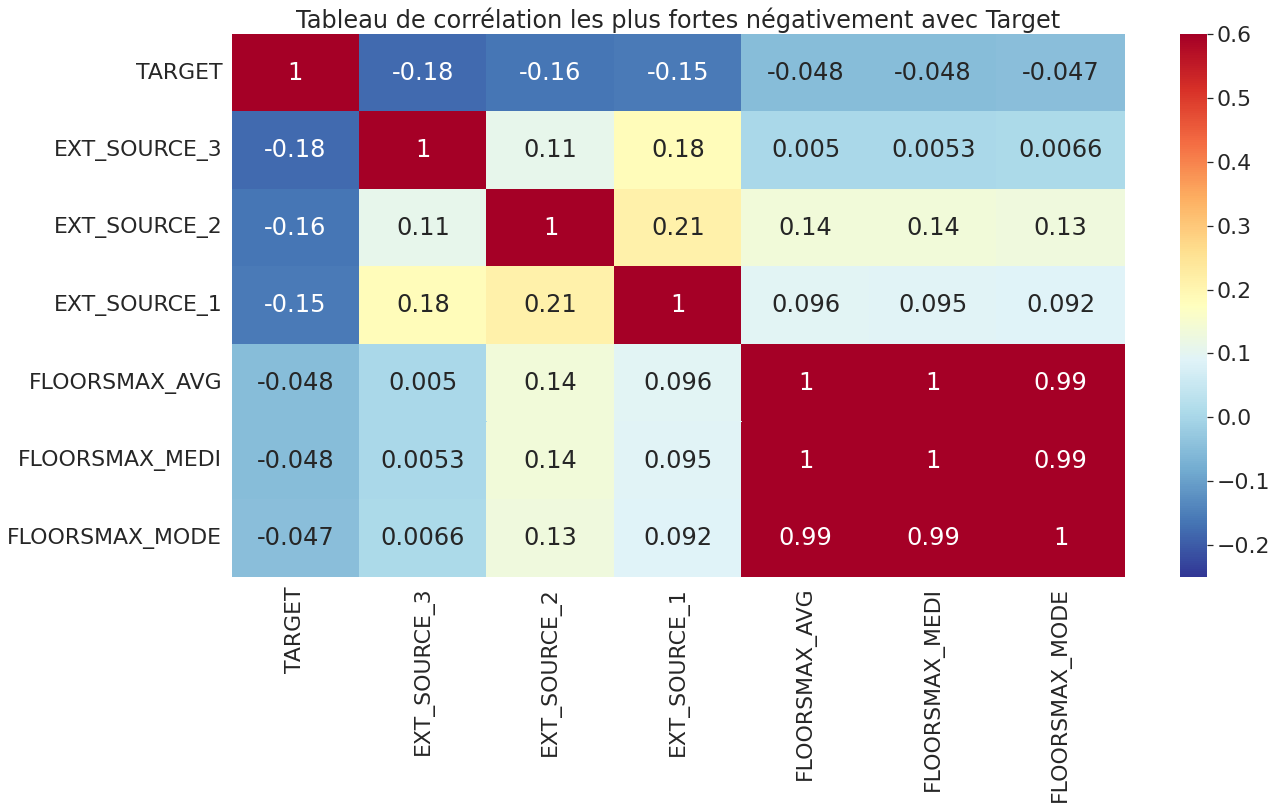

In [ ]:
most_corr=dfApplicationTrain[['TARGET','EXT_SOURCE_3',
                      'EXT_SOURCE_2','EXT_SOURCE_1','FLOORSMAX_AVG', 'FLOORSMAX_MEDI','FLOORSMAX_MODE']]
most_corr_corr = most_corr.corr()

sns.set_style("dark")
sns.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 1.0})
fig, axes = plt.subplots(figsize = (20,10),sharey=True)
sns.heatmap(most_corr_corr,cmap=plt.cm.RdYlBu_r,vmin=-0.25,vmax=0.6,annot=True)
plt.title('Tableau de corrélation les plus fortes négativement avec Target')

In [ ]:
dfFinal["DAYS_BIRTH"].describe()

count    204080.000000
mean     -16033.271575
std        4357.954222
min      -25201.000000
25%      -19661.000000
50%      -15741.000000
75%      -12414.000000
max       -7338.000000
Name: DAYS_BIRTH, dtype: float64

In [ ]:
dfFinal["REGION_RATING_CLIENT_W_CITY"].describe()

count    204080.000000
mean          2.027832
std           0.506621
min          -1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64

In [ ]:
dfFinal["REGION_RATING_CLIENT"].describe()

count    204080.000000
mean          2.049877
std           0.513229
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: REGION_RATING_CLIENT, dtype: float64

In [ ]:
dfFinal["DAYS_LAST_PHONE_CHANGE"].describe()

count    204079.000000
mean       -989.461380
std         840.832001
min       -4361.000000
25%       -1609.000000
50%        -780.000000
75%        -294.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [ ]:
dfFinal["DAYS_ID_PUBLISH"].describe()

count    204080.000000
mean      -3007.223662
std        1525.277822
min       -7197.000000
25%       -4330.000000
50%       -3250.000000
75%       -1711.000000
max           0.000000
Name: DAYS_ID_PUBLISH, dtype: float64

In [ ]:
dfFinal["REG_CITY_NOT_WORK_CITY"].describe()

count    204080.000000
mean          0.229361
std           0.420423
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_CITY_NOT_WORK_CITY, dtype: float64

In [ ]:
dfworkused=dfwork[["SK_ID_CURR","TARGET","NAME_CONTRACT_TYPE","CODE_GENDER","CNT_CHILDREN","AMT_CREDIT","AMT_ANNUITY"
,"AMT_GOODS_PRICE","NAME_TYPE_SUITE","NAME_INCOME_TYPE","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","NAME_HOUSING_TYPE","REGION_POPULATION_RELATIVE","DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","FLAG_WORK_PHONE",
"FLAG_PHONE","OCCUPATION_TYPE","REGION_RATING_CLIENT","REGION_RATING_CLIENT_W_CITY","WEEKDAY_APPR_PROCESS_START","REG_CITY_NOT_LIVE_CITY","REG_CITY_NOT_WORK_CITY","LIVE_CITY_NOT_WORK_CITY","EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3"
,"FLOORSMAX_AVG","DAYS_LAST_PHONE_CHANGE","FLAG_DOCUMENT_3","FLAG_DOCUMENT_6","FLAG_DOCUMENT_16","CAR_AGE_CAT"]]

In [ ]:
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
dfworkused.FLOORSMAX_AVG=imp_median.fit_transform(dfworkused.FLOORSMAX_AVG.values.reshape(-1,1))[:,0]

In [ ]:
dfworkused

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,...,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLOORSMAX_AVG,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_16,CAR_AGE_CAT,FLOORSMAX_MEDI
0,100002,1,Cash loans,M,0,406597.5,24700.5,351000.0,Unaccompanied,Working,...,0.083037,0.262949,0.139376,0.0833,-1134.0,1.0,0.0,0.0,unknown,0.0833
1,100003,0,Cash loans,F,0,1293502.5,35698.5,1129500.0,Family,State servant,...,0.311267,0.622246,0.535276,0.2917,-828.0,1.0,0.0,0.0,unknown,0.2917
2,100004,0,Revolving loans,M,0,135000.0,6750.0,135000.0,Unaccompanied,Working,...,0.505285,0.555912,0.729567,0.1667,-815.0,0.0,0.0,0.0,old,NaN
3,100006,0,Cash loans,F,0,312682.5,29686.5,297000.0,Unaccompanied,Working,...,0.505285,0.650442,0.535276,0.1667,-617.0,1.0,0.0,0.0,unknown,NaN
4,100007,0,Cash loans,M,0,513000.0,21865.5,513000.0,Unaccompanied,Working,...,0.505285,0.322738,0.535276,0.1667,-1106.0,0.0,0.0,0.0,unknown,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155331,280064,0,Cash loans,F,0,189621.0,14980.5,144000.0,Unaccompanied,Commercial associate,...,0.505285,0.184832,0.391055,0.1667,-1302.0,0.0,0.0,0.0,unknown,NaN
155332,280065,0,Cash loans,F,0,900000.0,38133.0,900000.0,Family,Pensioner,...,0.460212,0.312332,0.528093,0.1667,-447.0,0.0,1.0,0.0,medium,NaN
155333,280066,1,Cash loans,M,0,748651.5,59278.5,639000.0,Unaccompanied,Commercial associate,...,0.143794,0.372141,0.535276,0.1667,0.0,1.0,0.0,0.0,unknown,NaN
155334,280067,0,Cash loans,F,1,294322.5,15367.5,243000.0,Children,Working,...,0.448158,0.500734,0.431192,0.3333,0.0,1.0,0.0,1.0,old,0.3333


In [ ]:
dfexample["PAYMENT_RATE"]

0         0.060749
1         0.027598
2         0.050000
3         0.094941
4         0.042623
            ...   
204076    0.042354
204077    0.051267
204078    0.105414
204079    0.055840
204080    0.079003
Name: PAYMENT_RATE, Length: 204077, dtype: float64

In [ ]:
dfexample[dfexample["DAYS_BIRTH"].isnull()==1]

,index,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
155336,155336,280069,0.0,1,0,0,0,112500.0,9450.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfexample = dfexample.drop(155336)

In [ ]:
dfexample[dfexample["TARGET"]==1]

,index,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
0,0,100002,1.0,0,0,0,0,202500.0,406597.5,24700.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,26,100031,1.0,1,0,0,0,112500.0,979992.0,27076.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,40,100047,1.0,0,0,0,0,202500.0,1193580.0,35028.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
42,42,100049,1.0,1,0,1,0,135000.0,288873.0,16258.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
81,81,100096,1.0,1,0,0,0,81000.0,252000.0,14593.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155299,155299,280030,1.0,0,0,1,0,270000.0,321574.5,21064.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
155304,155304,280035,1.0,0,0,0,0,135000.0,161730.0,11070.0,...,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,1.0
155313,155313,280044,1.0,0,1,1,1,180000.0,545040.0,33475.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
155330,155330,280063,1.0,0,0,0,0,157500.0,387000.0,15273.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_current = pd.merge(dfworkused,dfexample[["SK_ID_CURR", "PAYMENT_RATE"]],on='SK_ID_CURR', how='left')

In [ ]:
df_current.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
CNT_CHILDREN                       0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_TYPE_SUITE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_WORK_PHONE                    0
FLAG_PHONE                         0
OCCUPATION_TYPE                    0
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
WEEKDAY_APPR_PROCESS_START         0
REG_CITY_NOT_LIVE_CITY             0
REG_CITY_NOT_WORK_CITY             0
LIVE_CITY_NOT_WORK_CITY            0
E

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


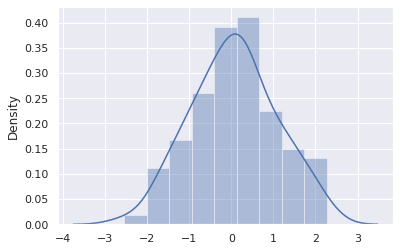

In [ ]:
x =df_current['PAYMENT_RATE']
sns.set_theme(); np.random.seed(0)
x = np.random.randn(100)
ax = sns.distplot(x)

In [ ]:
col="PAYMENT_RATE"
dfcoor=pd.DataFrame(df_current).corr()[[col]]
absAMT=abs(dfcoor)
absAMT.sort_values(by=col,ascending=False).head(5)

,PAYMENT_RATE
PAYMENT_RATE,1.000000
AMT_CREDIT,0.558176
AMT_GOODS_PRICE,0.532862
DAYS_BIRTH,0.092246
EXT_SOURCE_1,0.074413


In [ ]:
col="PAYMENT_RATE"
coor1="AMT_CREDIT"
coor2="AMT_GOODS_PRICE"
index_nan = list(df_current[col][df_current[col].isnull()].index)
for i in index_nan:
    feature_pred = df_current[col][
        ((df_current[coor1] == df_current.iloc[i][coor1]) &
          (df_current[coor2] == df_current.iloc[i][coor2])
        )].median()
    feature_med = df_current[col].median()
    if not np.isnan(feature_pred):
        df_current[col].iloc[i] = feature_pred
    else:
        df_current[col].iloc[i] = feature_med

In [ ]:
df_current = pd.merge(df_current,dfexample[["SK_ID_CURR", "POS_MONTHS_BALANCE_MEAN"]],on='SK_ID_CURR', how='left')

In [ ]:
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
df_current.POS_MONTHS_BALANCE_MEAN=imp_median.fit_transform(df_current.POS_MONTHS_BALANCE_MEAN.values.reshape(-1,1))[:,0]

In [ ]:
col="POS_MONTHS_BALANCE_MEAN"
dfcoor=pd.DataFrame(df_current).corr()[[col]]
absAMT=abs(dfcoor)
absAMT.sort_values(by=col,ascending=False).head(5)

,POS_MONTHS_BALANCE_MEAN
POS_MONTHS_BALANCE_MEAN,1.000000
DAYS_LAST_PHONE_CHANGE,0.230462
DAYS_ID_PUBLISH,0.064786
AMT_GOODS_PRICE,0.063144
AMT_CREDIT,0.062306


In [ ]:
df_current = pd.merge(df_current,dfexample[["SK_ID_CURR", "DAYS_EMPLOYED_PERC"]],on='SK_ID_CURR', how='left')

In [ ]:
print(dfexample.columns)

Index(['index', 'SK_ID_CURR', 'TARGET', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY',
       ...
       'CC_NAME_CONTRACT_STATUS_Signed_MAX',
       'CC_NAME_CONTRACT_STATUS_Signed_MEAN',
       'CC_NAME_CONTRACT_STATUS_Signed_SUM',
       'CC_NAME_CONTRACT_STATUS_Signed_VAR', 'CC_NAME_CONTRACT_STATUS_nan_MIN',
       'CC_NAME_CONTRACT_STATUS_nan_MAX', 'CC_NAME_CONTRACT_STATUS_nan_MEAN',
       'CC_NAME_CONTRACT_STATUS_nan_SUM', 'CC_NAME_CONTRACT_STATUS_nan_VAR',
       'CC_COUNT'],
      dtype='object', length=796)


In [ ]:
col="DAYS_EMPLOYED_PERC"
dfcoor=pd.DataFrame(df_current).corr()[[col]]
absAMT=abs(dfcoor)
absAMT.sort_values(by=col,ascending=False).head(5)

,DAYS_EMPLOYED_PERC
DAYS_EMPLOYED_PERC,1.000000
DAYS_EMPLOYED,0.954875
DAYS_BIRTH,0.138264
DAYS_LAST_PHONE_CHANGE,0.131822
REG_CITY_NOT_WORK_CITY,0.114265


In [ ]:
col="DAYS_EMPLOYED_PERC"
coor1="DAYS_EMPLOYED"
index_nan = list(df_current[col][df_current[col].isnull()].index)
for i in index_nan:
    feature_pred = df_current[col][
        ((df_current[coor1] == df_current.iloc[i][coor1]))].median()
    feature_med = df_current[col].median()
    if not np.isnan(feature_pred):
        df_current[col].iloc[i] = feature_pred
    else:
        df_current[col].iloc[i] = feature_med

In [ ]:
df_current = pd.merge(df_current,dfexample[["SK_ID_CURR", "ANNUITY_INCOME_PERC"]],on='SK_ID_CURR', how='left')

In [ ]:
col="ANNUITY_INCOME_PERC"
dfcoor=pd.DataFrame(df_current).corr()[[col]]
absAMT=abs(dfcoor)
absAMT.sort_values(by=col,ascending=False).head(5)

,ANNUITY_INCOME_PERC
ANNUITY_INCOME_PERC,1.000000
AMT_ANNUITY,0.482596
AMT_CREDIT,0.373896
AMT_GOODS_PRICE,0.368644
FLAG_DOCUMENT_3,0.140195


In [ ]:
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
df_current.ANNUITY_INCOME_PERC=imp_median.fit_transform(df_current.ANNUITY_INCOME_PERC.values.reshape(-1,1))[:,0]

In [ ]:
df_current=df_current.drop(columns=['AMT_CREDIT_y'])

In [ ]:
df_current=df_current.rename(columns={"AMT_CREDIT_x": "AMT_CREDIT"})

In [ ]:
df_current = pd.merge(df_current,dfexample[["SK_ID_CURR", "POS_MONTHS_BALANCE_MAX"]],on='SK_ID_CURR', how='left')

In [ ]:
col="POS_MONTHS_BALANCE_MAX"
dfcoor=pd.DataFrame(df_current).corr()[[col]]
absAMT=abs(dfcoor)
absAMT.sort_values(by=col,ascending=False).head(5)

,POS_MONTHS_BALANCE_MAX
POS_MONTHS_BALANCE_MAX,1.000000
POS_MONTHS_BALANCE_MEAN,0.828340
DAYS_LAST_PHONE_CHANGE,0.100805
ANNUITY_INCOME_PERC,0.059403
FLAG_WORK_PHONE,0.059177


In [ ]:
col="POS_MONTHS_BALANCE_MAX"
coor1="POS_MONTHS_BALANCE_MEAN"
index_nan = list(df_current[col][df_current[col].isnull()].index)
for i in index_nan:
    feature_pred = df_current[col][
        ((df_current[coor1] == df_current.iloc[i][coor1]))].median()
    feature_med = df_current[col].median()
    if not np.isnan(feature_pred):
        df_current[col].iloc[i] = feature_pred
    else:
        df_current[col].iloc[i] = feature_med

In [ ]:
df_current = pd.merge(df_current,dfexample[["SK_ID_CURR", "INCOME_CREDIT_PERC"]],on='SK_ID_CURR', how='left')

In [ ]:
col="INCOME_CREDIT_PERC"
dfcoor=pd.DataFrame(df_current).corr()[[col]]
absAMT=abs(dfcoor)
absAMT.sort_values(by=col,ascending=False).head(5)

,INCOME_CREDIT_PERC
INCOME_CREDIT_PERC,1.000000
ANNUITY_INCOME_PERC,0.316572
AMT_CREDIT,0.280232
PAYMENT_RATE,0.274317
AMT_GOODS_PRICE,0.270777


In [ ]:
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
df_current.INCOME_CREDIT_PERC=imp_median.fit_transform(df_current.INCOME_CREDIT_PERC.values.reshape(-1,1))[:,0]

In [ ]:
df_current = pd.merge(df_current,dfexample[["SK_ID_CURR", "POS_MONTHS_BALANCE_SIZE"]],on='SK_ID_CURR', how='left')

In [ ]:
col="POS_MONTHS_BALANCE_SIZE"
dfcoor=pd.DataFrame(df_current).corr()[[col]]
absAMT=abs(dfcoor)
absAMT.sort_values(by=col,ascending=False).head(5)

,POS_MONTHS_BALANCE_SIZE
POS_MONTHS_BALANCE_SIZE,1.000000
POS_MONTHS_BALANCE_MAX,0.392979
DAYS_BIRTH,0.200612
DAYS_LAST_PHONE_CHANGE,0.175689
DAYS_EMPLOYED,0.120494


In [ ]:
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
df_current.POS_MONTHS_BALANCE_SIZE=imp_median.fit_transform(df_current.POS_MONTHS_BALANCE_SIZE.values.reshape(-1,1))[:,0]

In [ ]:
df_current = pd.merge(df_current,dfexample[["SK_ID_CURR", "DAYS_LAST_PHONE_CHANGE"]],on='SK_ID_CURR', how='left')

In [ ]:
df_current=df_current.drop(columns=['DAYS_LAST_PHONE_CHANGE_y'])
df_current=df_current.rename(columns={"DAYS_LAST_PHONE_CHANGE_x": "DAYS_LAST_PHONE_CHANGE"})

In [ ]:
df_current = pd.merge(df_current,dfexample[["SK_ID_CURR", "AMT_INCOME_TOTAL"]],on='SK_ID_CURR', how='left')

In [ ]:
col="AMT_INCOME_TOTAL"
dfcoor=pd.DataFrame(df_current).corr()[[col]]
absAMT=abs(dfcoor)
absAMT.sort_values(by=col,ascending=False).head(5)

,AMT_INCOME_TOTAL
AMT_INCOME_TOTAL,1.000000
INCOME_CREDIT_PERC,0.842175
AMT_ANNUITY,0.146380
AMT_GOODS_PRICE,0.121752
AMT_CREDIT,0.119637


In [ ]:
col="AMT_INCOME_TOTAL"
coor1="INCOME_CREDIT_PERC"
index_nan = list(df_current[col][df_current[col].isnull()].index)
for i in index_nan:
    feature_pred = df_current[col][
        ((df_current[coor1] == df_current.iloc[i][coor1]))].median()
    feature_med = df_current[col].median()
    if not np.isnan(feature_pred):
        df_current[col].iloc[i] = feature_pred
    else:
        df_current[col].iloc[i] = feature_med

In [ ]:
df_current = pd.merge(df_current,dfexample[["SK_ID_CURR", "INSTAL_AMT_PAYMENT_MIN"]],on='SK_ID_CURR', how='left') 

In [ ]:
col="INSTAL_AMT_PAYMENT_MIN"
dfcoor=pd.DataFrame(df_current).corr()[[col]]
absAMT=abs(dfcoor)
absAMT.sort_values(by=col,ascending=False).head(5)

,INSTAL_AMT_PAYMENT_MIN
INSTAL_AMT_PAYMENT_MIN,1.000000
POS_MONTHS_BALANCE_SIZE,0.102835
POS_MONTHS_BALANCE_MEAN,0.092848
AMT_ANNUITY,0.073194
DAYS_LAST_PHONE_CHANGE,0.070090


In [ ]:
df_current = pd.merge(df_current,dfexample[["SK_ID_CURR", "INCOME_PER_PERSON"]],on='SK_ID_CURR', how='left') 

In [ ]:
col="INCOME_PER_PERSON"
dfcoor=pd.DataFrame(df_current).corr()[[col]]
absAMT=abs(dfcoor)
absAMT.sort_values(by=col,ascending=False).head(5)

,INCOME_PER_PERSON
INCOME_PER_PERSON,1.000000
AMT_INCOME_TOTAL,0.907993
INCOME_CREDIT_PERC,0.754668
CNT_CHILDREN,0.191546
ANNUITY_INCOME_PERC,0.183129


In [ ]:
col="INCOME_PER_PERSON"
coor1="AMT_INCOME_TOTAL"
coor2="INCOME_CREDIT_PERC"
index_nan = list(df_current[col][df_current[col].isnull()].index)
for i in index_nan:
    feature_pred = df_current[col][
        ((df_current[coor1] == df_current.iloc[i][coor1]) &
          (df_current[coor2] == df_current.iloc[i][coor2])
        )].median()
    feature_med = df_current[col].median()
    if not np.isnan(feature_pred):
        df_current[col].iloc[i] = feature_pred
    else:
        df_current[col].iloc[i] = feature_med

In [ ]:
df_current = pd.merge(df_current,dfexample[["SK_ID_CURR", "PREV_DAYS_DECISION_MAX"]],on='SK_ID_CURR', how='left') 

In [ ]:
df_current = pd.merge(df_current,dfexample[["SK_ID_CURR", "INSTAL_DBD_MEAN"]],on='SK_ID_CURR', how='left') 

In [ ]:
#df_current=df_current.drop(columns=['INSTAL_AMT_PAYMENT_MIN'])
#df_current=df_current.drop(columns=['INSTAL_DBD_MEAN'])
df_current=df_current.drop(columns=['PREV_DAYS_DECISION_MAX'])

In [ ]:
y = dfworkused["TARGET"]
X = dfworkused.drop(['TARGET'], axis=1)
X = X.drop(['NAME_CONTRACT_TYPE'], axis=1)
X = X.drop(['CODE_GENDER'], axis=1)
#X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                                  test_size=0.33, 
                                                  random_state=42)

In [ ]:
#model_save_name = 'df_current.pkl'
#pickle.dump(df_current, open('/content/drive/MyDrive/Data/{}'.format(model_save_name),'wb'))

In [ ]:
df_current=LoadPickle("df_current")

In [ ]:
labelencoder = LabelEncoder()
df_current['NAME_CONTRACT_TYPE_INT'] = labelencoder.fit_transform(df_current['NAME_CONTRACT_TYPE'])
df_current['CODE_GENDER_INT'] = labelencoder.fit_transform(df_current['CODE_GENDER'])

df_current=encoder('NAME_TYPE_SUITE',df_current)
df_current=encoder('NAME_EDUCATION_TYPE',df_current)
df_current=encoder('NAME_INCOME_TYPE',df_current)
df_current=encoder('NAME_FAMILY_STATUS',df_current)
df_current=encoder('NAME_HOUSING_TYPE',df_current)
df_current=encoder('OCCUPATION_TYPE',df_current)
df_current=encoder('CAR_AGE_CAT',df_current)
df_current=encoder('WEEKDAY_APPR_PROCESS_START',df_current)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is d

In [ ]:
df_current.dtypes

SK_ID_CURR                                int64
TARGET                                    int64
NAME_CONTRACT_TYPE                       object
CODE_GENDER                              object
CNT_CHILDREN                              int64
                                         ...   
WEEKDAY_APPR_PROCESS_START_SATURDAY     float64
WEEKDAY_APPR_PROCESS_START_SUNDAY       float64
WEEKDAY_APPR_PROCESS_START_THURSDAY     float64
WEEKDAY_APPR_PROCESS_START_TUESDAY      float64
WEEKDAY_APPR_PROCESS_START_WEDNESDAY    float64
Length: 101, dtype: object

In [ ]:
pd.set_option('display.max_columns', None)  
X_train.dtypes

SK_ID_CURR                                int64
CNT_CHILDREN                              int64
AMT_CREDIT                              float64
AMT_ANNUITY                             float64
AMT_GOODS_PRICE                         float64
                                         ...   
WEEKDAY_APPR_PROCESS_START_SATURDAY     float64
WEEKDAY_APPR_PROCESS_START_SUNDAY       float64
WEEKDAY_APPR_PROCESS_START_THURSDAY     float64
WEEKDAY_APPR_PROCESS_START_TUESDAY      float64
WEEKDAY_APPR_PROCESS_START_WEDNESDAY    float64
Length: 98, dtype: object

In [ ]:
df_current=df_current.drop(columns=['NAME_CONTRACT_TYPE','CODE_GENDER']) #'NAME_TYPE_SUITE']),'NAME_EDUCATION_TYPE','NAME_INCOME_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE',"OCCUPATION_TYPE","CAR_AGE_CAT","WEEKDAY_APPR_PROCESS_START"])

In [ ]:
df_current[["DAYS_EMPLOYED_PERC","ANNUITY_INCOME_PERC","AMT_CREDIT","POS_MONTHS_BALANCE_MAX","INCOME_CREDIT_PERC","DAYS_LAST_PHONE_CHANGE","AMT_INCOME_TOTAL","INCOME_PER_PERSON"]]

,DAYS_EMPLOYED_PERC,ANNUITY_INCOME_PERC,AMT_CREDIT,POS_MONTHS_BALANCE_MAX,INCOME_CREDIT_PERC,DAYS_LAST_PHONE_CHANGE,AMT_INCOME_TOTAL,INCOME_PER_PERSON
0,0.067329,0.121978,406597.5,-13.0,0.498036,-1134.0,202500.0,202500.0
1,0.070862,0.132217,1293502.5,-23.0,0.208736,-828.0,270000.0,135000.0
2,0.011814,0.100000,135000.0,-25.0,0.500000,-815.0,67500.0,67500.0
3,0.159905,0.219900,312682.5,-14.0,0.431748,-617.0,135000.0,67500.0
4,0.152418,0.179963,513000.0,-3.0,0.236842,-1106.0,121500.0,121500.0
...,...,...,...,...,...,...,...,...
155331,0.015182,0.087605,189621.0,-4.0,0.901799,-1302.0,171000.0,85500.0
155332,0.118533,0.242114,900000.0,-14.0,0.175000,-447.0,157500.0,78750.0
155333,0.151723,0.219550,748651.5,-4.0,0.360648,0.0,270000.0,270000.0
155334,0.145936,0.170750,294322.5,-22.0,0.305787,0.0,90000.0,30000.0


In [ ]:
y = df_current["TARGET"]
X = df_current.drop(['TARGET'], axis=1)
X = X.drop(['NAME_CONTRACT_TYPE'], axis=1)
X = X.drop(['PREV_DAYS_DECISION_MAX'], axis=1)
X = X.drop(['CODE_GENDER'], axis=1)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                                  test_size=0.33, 
                                                  random_state=42)

In [ ]:
oversample = SMOTE()
X, y = oversample.fit_resample(X_train, y_train)
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression(multi_class='ovr', solver='liblinear')
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X,y)
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

In [ ]:
oversample = SMOTE()
X, y = oversample.fit_resample(X_train, y_train)
lm = LogisticRegression(multi_class='ovr', solver='liblinear',C=1000,penalty='l1')
lm.fit(X, y)

LogisticRegression(C=1000, multi_class='ovr', penalty='l1', solver='liblinear')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


array([[33731, 13301],
       [ 1796,  2433]])

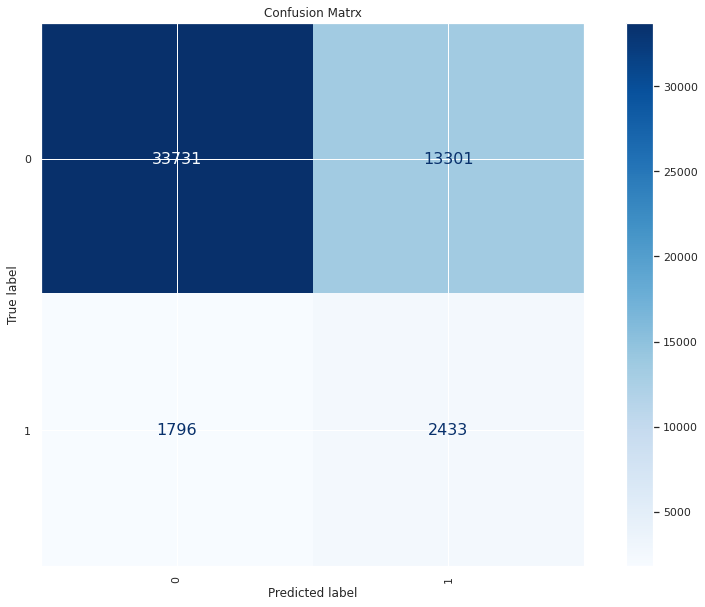

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.rcParams.update({'font.size': 16})
ax.set_title('Confusion Matrx')
disp =metrics.plot_confusion_matrix(lm, X_test, y_test, ax = ax, cmap=plt.cm.Blues, xticks_rotation='vertical')
disp.confusion_matrix

In [ ]:
y_pred=np.around(lm.predict(X_test))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.72      0.82     47032
           1       0.15      0.58      0.24      4229

    accuracy                           0.71     51261
   macro avg       0.55      0.65      0.53     51261
weighted avg       0.88      0.71      0.77     51261



In [ ]:
importances = pd.DataFrame(data={
    'Attribute': X.columns,
    'Importance': lm.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

In [ ]:
importances

,Attribute,Importance
54,NAME_INCOME_TYPE_Unemployed,1.813316
77,OCCUPATION_TYPE_Low-skill Laborers,1.603058
5,REGION_POPULATION_RELATIVE,1.381365
72,OCCUPATION_TYPE_Drivers,1.371867
84,OCCUPATION_TYPE_Security staff,1.187601
...,...,...
19,EXT_SOURCE_3,-3.089038
60,NAME_FAMILY_STATUS_Unknown,-4.328584
48,NAME_INCOME_TYPE_Businessman,-5.538741
25,PAYMENT_RATE,-6.383639


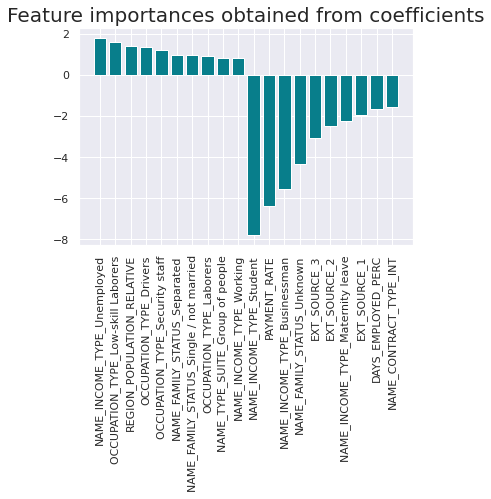

In [ ]:
test=importances.head(10)
test2=test.append( importances.sort_values(by='Importance', ascending=True).head(10))

plt.bar(x=test2['Attribute'], height=test2['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
importances.head(10)

,Attribute,Importance
54,NAME_INCOME_TYPE_Unemployed,1.813316
77,OCCUPATION_TYPE_Low-skill Laborers,1.603058
5,REGION_POPULATION_RELATIVE,1.381365
72,OCCUPATION_TYPE_Drivers,1.371867
84,OCCUPATION_TYPE_Security staff,1.187601
58,NAME_FAMILY_STATUS_Separated,0.973479
59,NAME_FAMILY_STATUS_Single / not married,0.957968
76,OCCUPATION_TYPE_Laborers,0.905582
38,NAME_TYPE_SUITE_Group of people,0.825983
55,NAME_INCOME_TYPE_Working,0.814325


In [ ]:
rf=RandomForestRegressor(n_estimators=500,criterion='mae',max_depth=6)
rf.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.rcParams.update({'font.size': 16})
ax.set_title('Confusion Matrx')
disp =metrics.plot_confusion_matrix(rf, X_test, y_test, ax = ax, cmap=plt.cm.Blues, xticks_rotation='vertical')
disp.confusion_matrix

,SK_ID_CURR,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,CAR_AGE_CAT_new,CAR_AGE_CAT_old,CAR_AGE_CAT_unknown,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY
90174,204694,1,270000.0,15075.0,270000.0,0.016612,-15378.0,-2503.0,-8556.0,-4489.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7037,108198,3,450000.0,30204.0,450000.0,0.015221,-13088.0,-235.0,-1094.0,-1248.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
111096,228893,0,123993.0,8757.0,103500.0,0.016612,-19964.0,-12179.0,-1574.0,-2983.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
138134,260193,0,328500.0,31999.5,328500.0,0.046220,-22656.0,365243.0,-4149.0,-4969.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
111990,229924,1,270000.0,13500.0,270000.0,0.009175,-11809.0,-4281.0,-5228.0,-4130.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152841,277140,1,148500.0,16884.0,148500.0,0.019101,-13212.0,-2005.0,-2029.0,-4439.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
94125,209300,1,239850.0,24574.5,225000.0,0.031329,-23406.0,365243.0,-12019.0,-4130.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
67749,178570,0,239850.0,23494.5,225000.0,0.025164,-24957.0,365243.0,-16609.0,-4938.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
95473,210849,0,900000.0,29164.5,900000.0,0.011657,-22076.0,-453.0,-671.0,-3996.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
CNT_CHILDREN                       0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_WORK_PHONE                    0
FLAG_PHONE                         0
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
REG_CITY_NOT_LIVE_CITY             0
REG_CITY_NOT_WORK_CITY             0
LIVE_CITY_NOT_WORK_CITY            0
EXT_SOURCE_1                       0
EXT_SOURCE_2                       0
EXT_SOURCE_3                       0
FLOORSMAX_AVG                      0
DAYS_LAST_PHONE_CHANGE             0
FLAG_DOCUMENT_3                    0
FLAG_DOCUMENT_6                    0
F

##traitement 4


In [ ]:
dfApplicationTest=LoadPickle("dfApplicationTest")
dfApplicationTrain=LoadPickle("dfApplicationTrain")

In [ ]:
dfFinal = dfApplicationTest.append(dfApplicationTrain).reset_index()

In [ ]:
dfFinal["CAR_AGE_CAT"]="unknown"
dfFinal["CAR_AGE_CAT"][(dfFinal["OWN_CAR_AGE"]>=0) & (dfFinal["OWN_CAR_AGE"]<11)]="new"
dfFinal["CAR_AGE_CAT"][(dfFinal["OWN_CAR_AGE"]>=11) & (dfFinal["OWN_CAR_AGE"]<21)]="medium"
dfFinal["CAR_AGE_CAT"][(dfFinal["OWN_CAR_AGE"]>=21)]="old"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

In [ ]:
dfworkused=dfFinal[["SK_ID_CURR","TARGET","NAME_CONTRACT_TYPE","CODE_GENDER","CNT_CHILDREN","AMT_CREDIT","AMT_ANNUITY"
,"AMT_GOODS_PRICE","NAME_TYPE_SUITE","NAME_INCOME_TYPE","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","NAME_HOUSING_TYPE","REGION_POPULATION_RELATIVE","DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","FLAG_WORK_PHONE",
"FLAG_PHONE","OCCUPATION_TYPE","REGION_RATING_CLIENT","REGION_RATING_CLIENT_W_CITY","WEEKDAY_APPR_PROCESS_START","REG_CITY_NOT_LIVE_CITY","REG_CITY_NOT_WORK_CITY","LIVE_CITY_NOT_WORK_CITY","EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3"
,"FLOORSMAX_AVG","DAYS_LAST_PHONE_CHANGE","FLAG_DOCUMENT_3","FLAG_DOCUMENT_6","FLAG_DOCUMENT_16","CAR_AGE_CAT"]]

In [ ]:
dfexample=LoadPickle("dfFinal")

In [ ]:
dfworkused = pd.merge(dfworkused,dfexample[["SK_ID_CURR", "POS_MONTHS_BALANCE_MEAN"]],on='SK_ID_CURR', how='left')
dfworkused = pd.merge(dfworkused,dfexample[["SK_ID_CURR", "DAYS_EMPLOYED_PERC"]],on='SK_ID_CURR', how='left')
dfworkused = pd.merge(dfworkused,dfexample[["SK_ID_CURR", "ANNUITY_INCOME_PERC"]],on='SK_ID_CURR', how='left')
dfworkused = pd.merge(dfworkused,dfexample[["SK_ID_CURR", "POS_MONTHS_BALANCE_MAX"]],on='SK_ID_CURR', how='left')
dfworkused = pd.merge(dfworkused,dfexample[["SK_ID_CURR", "INCOME_CREDIT_PERC"]],on='SK_ID_CURR', how='left')
dfworkused = pd.merge(dfworkused,dfexample[["SK_ID_CURR", "POS_MONTHS_BALANCE_SIZE"]],on='SK_ID_CURR', how='left')
dfworkused = pd.merge(dfworkused,dfexample[["SK_ID_CURR", "INCOME_PER_PERSON"]],on='SK_ID_CURR', how='left') 
dfworkused = pd.merge(dfworkused,dfexample[["SK_ID_CURR", "PREV_DAYS_DECISION_MAX"]],on='SK_ID_CURR', how='left') 
dfworkused = pd.merge(dfworkused,dfexample[["SK_ID_CURR", "INSTAL_DBD_MEAN"]],on='SK_ID_CURR', how='left') 


In [ ]:
dfworkused

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,...,CAR_AGE_CAT,POS_MONTHS_BALANCE_MEAN,DAYS_EMPLOYED_PERC,ANNUITY_INCOME_PERC,POS_MONTHS_BALANCE_MAX,INCOME_CREDIT_PERC,POS_MONTHS_BALANCE_SIZE,INCOME_PER_PERSON,PREV_DAYS_DECISION_MAX,INSTAL_DBD_MEAN
0,100001,NaN,Cash loans,F,0,568800.0,20560.5,450000.0,Unaccompanied,Working,...,unknown,-95.500000,0.121044,0.152300,-95.0,0.237342,2.0,67500.0,-1740.0,NaN
1,100005,NaN,Cash loans,M,0,222768.0,17370.0,180000.0,Unaccompanied,Working,...,unknown,-22.000000,0.247398,0.175455,-21.0,0.444409,2.0,49500.0,NaN,21.333333
2,100013,NaN,Cash loans,M,0,663264.0,69777.0,630000.0,NaN,Working,...,new,-25.600000,0.222477,0.344578,-3.0,0.305308,10.0,101250.0,-1999.0,6.750000
3,100028,NaN,Cash loans,F,2,1575000.0,49018.5,1575000.0,Unaccompanied,Working,...,unknown,-41.428571,0.133515,0.155614,-23.0,0.200000,7.0,78750.0,-1490.0,3.673913
4,100038,NaN,Cash loans,M,1,625500.0,32067.0,625500.0,Unaccompanied,Working,...,medium,-25.500000,0.168021,0.178150,-25.0,0.287770,2.0,60000.0,NaN,12.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204076,280065,0.0,Cash loans,F,0,900000.0,38133.0,900000.0,Family,Pensioner,...,medium,-14.000000,NaN,0.242114,-14.0,0.175000,1.0,78750.0,-447.0,NaN
204077,280066,1.0,Cash loans,M,0,748651.5,59278.5,639000.0,Unaccompanied,Commercial associate,...,unknown,-4.000000,0.151723,0.219550,-4.0,0.360648,1.0,270000.0,NaN,NaN
204078,280067,0.0,Cash loans,F,1,294322.5,15367.5,243000.0,Children,Working,...,old,NaN,0.145936,0.170750,NaN,0.305787,NaN,30000.0,NaN,NaN
204079,280068,0.0,Cash loans,F,0,787131.0,26145.0,679500.0,Unaccompanied,Commercial associate,...,new,-24.363636,0.036521,0.129111,-7.0,0.257263,11.0,101250.0,-2023.0,NaN


In [ ]:
dfworkused.isnull().sum()

SK_ID_CURR                          0
TARGET                          48744
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
CNT_CHILDREN                        0
AMT_CREDIT                          0
AMT_ANNUITY                        33
AMT_GOODS_PRICE                   131
NAME_TYPE_SUITE                  1548
NAME_INCOME_TYPE                    1
NAME_EDUCATION_TYPE                 1
NAME_FAMILY_STATUS                  1
NAME_HOUSING_TYPE                   1
REGION_POPULATION_RELATIVE          1
DAYS_BIRTH                          1
DAYS_EMPLOYED                       1
DAYS_REGISTRATION                   1
DAYS_ID_PUBLISH                     1
FLAG_WORK_PHONE                     1
FLAG_PHONE                          1
OCCUPATION_TYPE                 64299
REGION_RATING_CLIENT                1
REGION_RATING_CLIENT_W_CITY         1
WEEKDAY_APPR_PROCESS_START          1
REG_CITY_NOT_LIVE_CITY              1
REG_CITY_NOT_WORK_CITY              1
LIVE_CITY_NO

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
dfval=dfworkused[dfworkused['TARGET'].notnull()]

In [ ]:
dfval 

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,...,CAR_AGE_CAT,POS_MONTHS_BALANCE_MEAN,DAYS_EMPLOYED_PERC,ANNUITY_INCOME_PERC,POS_MONTHS_BALANCE_MAX,INCOME_CREDIT_PERC,POS_MONTHS_BALANCE_SIZE,INCOME_PER_PERSON,PREV_DAYS_DECISION_MAX,INSTAL_DBD_MEAN
48744,100002,1.0,Cash loans,M,0,406597.5,24700.5,351000.0,Unaccompanied,Working,...,unknown,-14.500000,0.067329,0.121978,-13.0,0.498036,2.0,202500.0,NaN,18.500000
48745,100003,0.0,Cash loans,F,0,1293502.5,35698.5,1129500.0,Family,State servant,...,unknown,-46.000000,0.070862,0.132217,-23.0,0.208736,6.0,135000.0,NaN,6.100000
48746,100004,0.0,Revolving loans,M,0,135000.0,6750.0,135000.0,Unaccompanied,Working,...,old,-25.000000,0.011814,0.100000,-25.0,0.500000,1.0,67500.0,NaN,9.000000
48747,100006,0.0,Cash loans,F,0,312682.5,29686.5,297000.0,Unaccompanied,Working,...,unknown,-16.000000,0.159905,0.219900,-14.0,0.431748,2.0,67500.0,-181.0,29.000000
48748,100007,0.0,Cash loans,M,0,513000.0,21865.5,513000.0,Unaccompanied,Working,...,unknown,-23.071429,0.152418,0.179963,-3.0,0.236842,14.0,121500.0,-865.0,3.466667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204076,280065,0.0,Cash loans,F,0,900000.0,38133.0,900000.0,Family,Pensioner,...,medium,-14.000000,NaN,0.242114,-14.0,0.175000,1.0,78750.0,-447.0,NaN
204077,280066,1.0,Cash loans,M,0,748651.5,59278.5,639000.0,Unaccompanied,Commercial associate,...,unknown,-4.000000,0.151723,0.219550,-4.0,0.360648,1.0,270000.0,NaN,NaN
204078,280067,0.0,Cash loans,F,1,294322.5,15367.5,243000.0,Children,Working,...,old,NaN,0.145936,0.170750,NaN,0.305787,NaN,30000.0,NaN,NaN
204079,280068,0.0,Cash loans,F,0,787131.0,26145.0,679500.0,Unaccompanied,Commercial associate,...,new,-24.363636,0.036521,0.129111,-7.0,0.257263,11.0,101250.0,-2023.0,NaN


In [ ]:
dfval.info()

NameError: ignored

In [ ]:
dfval = dfval.drop(['SK_ID_CURR'], axis=1)
dfval = dfval.drop(['NAME_CONTRACT_TYPE'], axis=1)
dfval = dfval.drop(['CODE_GENDER'], axis=1)
dfval = dfval.drop(['NAME_TYPE_SUITE'], axis=1)
dfval = dfval.drop(['NAME_INCOME_TYPE'], axis=1)
dfval = dfval.drop(['NAME_EDUCATION_TYPE'], axis=1)
dfval = dfval.drop(['NAME_FAMILY_STATUS'], axis=1)
dfval = dfval.drop(['NAME_HOUSING_TYPE'], axis=1)
dfval = dfval.drop(['OCCUPATION_TYPE'], axis=1)
dfval = dfval.drop(['CAR_AGE_CAT'], axis=1)




In [ ]:
dfval = dfval.drop(['WEEKDAY_APPR_PROCESS_START'], axis=1) 

In [ ]:
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
df_test=dfval
imputer.fit(df_test)
dfTest = imputer.transform(df_test)

In [ ]:
fdImpute=pd.DataFrame(dfTest, columns=df_test.columns)

In [ ]:
model_save_name = 'dfImpute.pkl'
pickle.dump(fdImpute, open('/content/drive/MyDrive/Data/{}'.format(model_save_name),'wb'))

In [ ]:
drive.mount("/content/drive")
dfImpute=LoadPickle("dfImpute")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
y = dfImpute["TARGET"]
X = dfImpute.drop(['TARGET'], axis=1)
#X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                                  test_size=0.33, 
                                                  random_state=42)

In [ ]:
oversample = SMOTE()
X, y = oversample.fit_resample(X_train, y_train)

In [ ]:
oversample = SMOTE()
X, y = oversample.fit_resample(X_train, y_train)
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression(multi_class='ovr', solver='liblinear')
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X,y)
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l1'}
accuracy : 0.6927291730997533


In [ ]:
# The parameters to be fit
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=10, scoring_fit='accuracy',
                       do_probabilities = False):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = gs.fit(X_train_data, y_train_data)
    
    if do_probabilities:
      pred = fitted_model.predict_proba(X_test_data)
    else:
      pred = fitted_model.predict(X_test_data)
    
    return fitted_model, pred

In [ ]:
lm = LogisticRegression(multi_class='ovr', solver='liblinear',C=1,penalty='l1')
lm.fit(X, y)

LogisticRegression(C=1, multi_class='ovr', penalty='l1', solver='liblinear')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


array([[32486, 14547],
       [ 1455,  2774]])

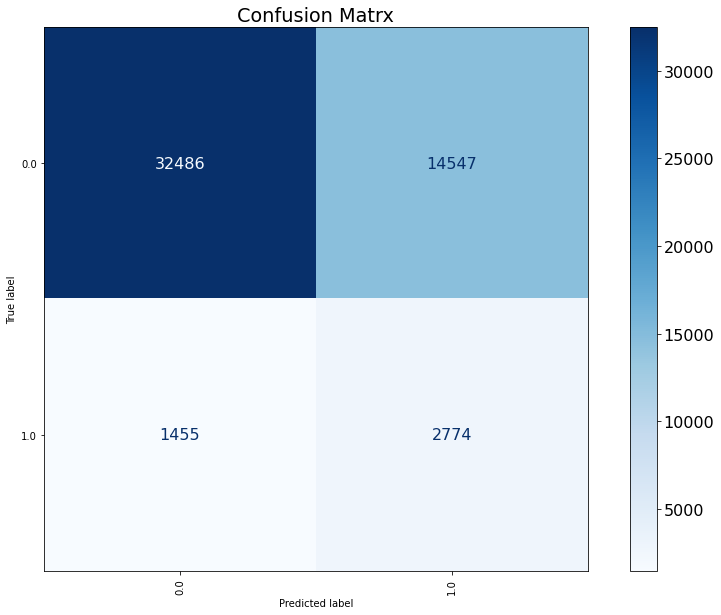

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.rcParams.update({'font.size': 16})
ax.set_title('Confusion Matrx')
disp =metrics.plot_confusion_matrix(lm, X_test, y_test, ax = ax, cmap=plt.cm.Blues, xticks_rotation='vertical')
disp.confusion_matrix

In [ ]:
y_pred=np.around(lm.predict(X_test))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.69      0.80     47033
         1.0       0.16      0.66      0.26      4229

    accuracy                           0.69     51262
   macro avg       0.56      0.67      0.53     51262
weighted avg       0.89      0.69      0.76     51262



In [ ]:
param_grid = { 
    'n_estimators': [200, 500],
   # 'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8] #,
    #'criterion' :['gini', 'entropy']    
}
rfc=RandomForestClassifier(random_state=42)
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X, y)
CV_rfc.best_params_

{'max_depth': 8, 'n_estimators': 500}

In [ ]:
model=RandomForestRegressor(n_estimators=500,max_depth=8)
model.fit(X,y)

RandomForestRegressor(max_depth=8, n_estimators=500)

In [ ]:
y_pred_test = model.predict(X_test)

In [ ]:
p_pred = y_pred_test.flatten()
print(p_pred.round(2))
# [1. 0.01 0.91 0.87 0.06 0.95 0.24 0.58 0.78 ...

# extract the predicted class labels
y_pred = np.where(p_pred > 0.5, 1, 0)

[0.35 0.32 0.15 ... 0.05 0.2  0.19]


In [ ]:
rmse = (np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
print('Lerreur quadratique moyenne est {}'.format(rmse))

Lerreur quadratique moyenne est 0.3240638549789943


In [ ]:
y_pred_test

array([0.34932087, 0.32401943, 0.14860275, ..., 0.04877372, 0.19732154,
       0.19169201])

In [ ]:
y_pred_test.flatten()

array([0.34932087, 0.32401943, 0.14860275, ..., 0.04877372, 0.19732154,
       0.19169201])

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94     47033
         1.0       0.16      0.06      0.09      4229

    accuracy                           0.90     51262
   macro avg       0.54      0.52      0.52     51262
weighted avg       0.86      0.90      0.87     51262



In [ ]:
feature_scores = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

FLAG_PHONE                     0.283557
REG_CITY_NOT_WORK_CITY         0.253620
EXT_SOURCE_2                   0.163349
FLAG_DOCUMENT_3                0.100229
EXT_SOURCE_3                   0.078823
REGION_RATING_CLIENT           0.041997
FLAG_WORK_PHONE                0.033507
REG_CITY_NOT_LIVE_CITY         0.009617
REGION_RATING_CLIENT_W_CITY    0.009349
LIVE_CITY_NOT_WORK_CITY        0.008081
CNT_CHILDREN                   0.004523
FLOORSMAX_AVG                  0.002382
DAYS_LAST_PHONE_CHANGE         0.001929
EXT_SOURCE_1                   0.001576
DAYS_EMPLOYED_PERC             0.000800
INCOME_CREDIT_PERC             0.000602
FLAG_DOCUMENT_6                0.000547
DAYS_BIRTH                     0.000517
POS_MONTHS_BALANCE_SIZE        0.000500
AMT_GOODS_PRICE                0.000498
ANNUITY_INCOME_PERC            0.000478
AMT_CREDIT                     0.000476
POS_MONTHS_BALANCE_MAX         0.000447
REGION_POPULATION_RELATIVE     0.000433
INCOME_PER_PERSON              0.000411


In [ ]:
# Creating a seaborn bar plot
sns.barplot(x=feature_scores, y=feature_scores.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score
y_pred=model.predict(X)
precision_score(y_pred_test, y_test)

ValueError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(labels, predictions)
print(conf_mat)

# Visualize it as a heatmap
import seaborn
seaborn.heatmap(CM)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.rcParams.update({'font.size': 16})
ax.set_title('Confusion Matrx')
disp =metrics.plot_confusion_matrix(model, X_test, y_test, ax = ax, cmap=plt.cm.Blues, xticks_rotation='vertical')
disp.confusion_matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


ValueError: ignored

Gaussien

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X, y)

GaussianNB()

In [ ]:
classifier.score(X_test, y_test)

0.6385236627521361

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.rcParams.update({'font.size': 16})
ax.set_title('Confusion Matrx')
disp =metrics.plot_confusion_matrix(classifier, X_test, y_test, ax = ax, cmap=plt.cm.Blues, xticks_rotation='vertical')
disp.confusion_matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


array([[30673, 16360],
       [ 2170,  2059]])

In [ ]:
features=X.columns

In [ ]:
from sklearn.inspection import permutation_importance

imps = permutation_importance(classifier, X_test, y_test)
importances = imps.importances_mean
std = imps.importances_std
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_test.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))

Feature ranking:
1. INSTAL_DBD_MEAN (0.000183)
2. FLAG_PHONE (0.000035)
3. FLAG_DOCUMENT_3 (0.000023)
4. FLOORSMAX_AVG (0.000016)
5. EXT_SOURCE_2 (0.000008)
6. EXT_SOURCE_1 (0.000008)
7. CNT_CHILDREN (0.000008)
8. DAYS_EMPLOYED_PERC (0.000008)
9. REGION_RATING_CLIENT (0.000004)
10. INCOME_CREDIT_PERC (0.000004)
11. REG_CITY_NOT_WORK_CITY (0.000004)
12. LIVE_CITY_NOT_WORK_CITY (0.000000)
13. REGION_POPULATION_RELATIVE (0.000000)
14. ANNUITY_INCOME_PERC (0.000000)
15. REG_CITY_NOT_LIVE_CITY (0.000000)
16. FLAG_DOCUMENT_6 (0.000000)
17. FLAG_DOCUMENT_16 (0.000000)
18. EXT_SOURCE_3 (-0.000004)
19. REGION_RATING_CLIENT_W_CITY (-0.000008)
20. FLAG_WORK_PHONE (-0.000008)
21. POS_MONTHS_BALANCE_SIZE (-0.000355)
22. INCOME_PER_PERSON (-0.001923)
23. DAYS_ID_PUBLISH (-0.005673)
24. AMT_ANNUITY (-0.009371)
25. POS_MONTHS_BALANCE_MEAN (-0.010831)
26. PREV_DAYS_DECISION_MAX (-0.011030)
27. POS_MONTHS_BALANCE_MAX (-0.011049)
28. DAYS_LAST_PHONE_CHANGE (-0.012056)
29. DAYS_REGISTRATION (-0.014767)
30

#traitement 5

In [ ]:
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=10, scoring_fit='accuracy',
                       do_probabilities = False):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = gs.fit(X_train_data, y_train_data)
    
    if do_probabilities:
      pred = fitted_model.predict_proba(X_test_data)
    else:
      pred = fitted_model.predict(X_test_data)
    
    return fitted_model, pred

In [ ]:
y = dfImpute["TARGET"]
X = dfImpute.drop(['TARGET'], axis=1)
#X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                                  test_size=0.33, 
                                                  random_state=42)

In [ ]:
oversample = SMOTE()
X, y = oversample.fit_resample(X_train, y_train)

In [ ]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
from sklearn.metrics import make_scorer, fbeta_score
f2_score = make_scorer(fbeta_score, beta=2, pos_label=1)

logreg=LogisticRegression(multi_class='ovr', solver='liblinear')
mdoel, prediction = algorithm_pipeline(X, X_test, y, y_test, logreg, grid, 10, f2_score, True)

Fitting 10 folds for each of 14 candidates, totalling 140 fits


In [ ]:
mdoel.best_estimator_

LogisticRegression(C=0.1, multi_class='ovr', penalty='l1', solver='liblinear')

In [ ]:
lm = LogisticRegression(multi_class='ovr', solver='liblinear',C=0.1,penalty='l1')
lm.fit(X, y)

LogisticRegression(C=0.1, multi_class='ovr', penalty='l1', solver='liblinear')

In [ ]:
y_pred=np.around(lm.predict(X_test))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.69      0.80     47033
         1.0       0.16      0.66      0.26      4229

    accuracy                           0.69     51262
   macro avg       0.56      0.67      0.53     51262
weighted avg       0.89      0.69      0.76     51262



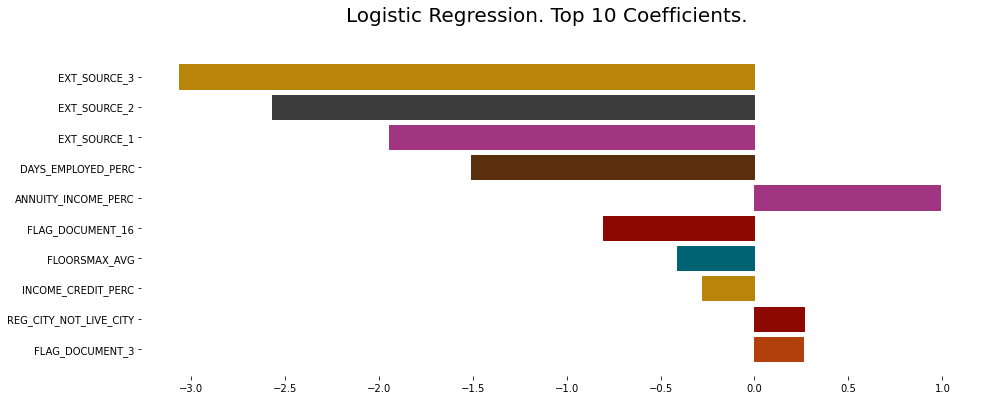

In [ ]:
plt.figure(figsize=(15,6))
logistic_reg_coeff = lm.coef_
color_list =  sns.color_palette("dark", len(dfImpute.drop(['TARGET'], axis=1).columns)) 
top_x = 10
logistic_reg_coeff =lm.coef_[0]
idx = np.argsort(np.abs(logistic_reg_coeff))[::-1] 
lreg_ax = plt.barh(dfImpute.drop(['TARGET'], axis=1).columns[idx[:top_x]][::-1], logistic_reg_coeff[idx[:top_x]][::-1])
for i,bar in enumerate(lreg_ax):
  bar.set_color(color_list[idx[:top_x][::-1][i]])
  plt.box(False) 
lr_title = plt.suptitle("Logistic Regression. Top " + str(top_x) + " Coefficients.", fontsize=20, fontweight="normal")

In [ ]:
# Bokeh


#dash

In [ ]:
from dash import Dash, dcc, html, Input, Output
app = Dash(__name__)

# assume you have a "long-form" data frame
# see https://plotly.com/python/px-arguments/ for more options
df = pd.DataFrame({
    "Fruit": ["Apples", "Oranges", "Bananas", "Apples", "Oranges", "Bananas"],
    "Amount": [4, 1, 2, 2, 4, 5],
    "City": ["SF", "SF", "SF", "Montreal", "Montreal", "Montreal"]
})

fig = px.bar(df, x="Fruit", y="Amount", color="City", barmode="group")

app.layout = html.Div(children=[
    html.H1(children='Hello Dash'),

    html.Div(children='''
        Dash: A web application framework for your data.
    '''),

    dcc.Graph(
        id='example-graph',
        figure=fig
    )
])

if __name__ == '__main__':
    app.run_server(debug=True)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


SystemExit: ignored

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning:

To exit: use 'exit', 'quit', or Ctrl-D.



In [ ]:
%%writefile my_app1.py
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
import dash
import dash_core_components as dcc
import dash_html_components as html
app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

app.layout = html.Div(children=[
    html.H1(children='Hello Dash'),

    html.Div(children='''
        Dash: A web application framework for Python.
    '''),

    dcc.Graph(
        id='example-graph',
        figure={
            'data': [
                {'x': [1, 2, 3], 'y': [4, 1, 2], 'type': 'bar', 'name': 'SF'},
                {'x': [1, 2, 3], 'y': [2, 4, 5], 'type': 'bar', 'name': u'Montréal'},
            ],
            'layout': {
                'title': 'Dash Data Visualization'
            }
        }
    )
])

if __name__ == '__main2__':
    app.run_server(debug=True)

Writing my_app1.py


In [ ]:
!pip install pyngrok --quiet

     |████████████████████████████████| 745 kB 4.3 MB/s 


In [ ]:
from pyngrok import ngrok

In [ ]:
ngrok.connect(8050)

<NgrokTunnel: "http://03fb-34-80-147-107.ngrok.io" -> "http://localhost:8050">

In [ ]:
### Run Dash app
!python my_app1.py

my_app1.py:3: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
my_app1.py:4: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [ ]:
ngrok.kill()

NameError: ignored

In [ ]:
import socket
tcpsock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
tcpsock.setsockopt(socket.SOL_SOCKET, socket.SO_REUSEADDR, 1)

In [ ]:
from dash import Dash, html, dcc
import plotly.express as px
import pandas as pd

app = Dash(__name__)

# assume you have a "long-form" data frame
# see https://plotly.com/python/px-arguments/ for more options
df = pd.DataFrame({
    "Fruit": ["Apples", "Oranges", "Bananas", "Apples", "Oranges", "Bananas"],
    "Amount": [4, 1, 2, 2, 4, 5],
    "City": ["SF", "SF", "SF", "Montreal", "Montreal", "Montreal"]
})

fig = px.bar(df, x="Fruit", y="Amount", color="City", barmode="group")

app.layout = html.Div(children=[
    html.H1(children='Hello Dash'),

    html.Div(children='''
        Dash: A web application framework for your data.
    '''),

    dcc.Graph(
        id='example-graph',
        figure=fig
    )
])

if __name__ == '__main__':
    app.run_server(debug=True)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


OSError: ignored

In [ ]:
!pip install bokeh

In [ ]:
from bokeh.plotting import figure, show, output_notebook

In [ ]:
output_notebook()

In [ ]:
# Our main plotting package (must have explicit import of submodules)
import bokeh.io
import bokeh.plotting

# Enable viewing Bokeh plots in the notebook
bokeh.io.output_notebook()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ValueError: ignored

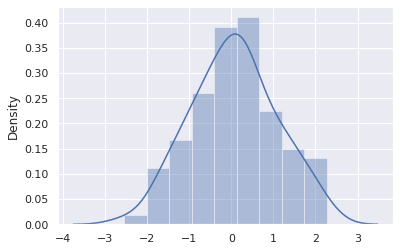

In [ ]:
plt.hist(x=d, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)

In [ ]:

data = np.random.normal(0, 0.5, 1000)
cols = ['red','green','orange','navy', 'cyan','red','green','orange','navy', 'cyan']
hist, edges = np.histogram(data, density=True, bins=10)
p = figure()
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="white",color=cols)


show(p)

In [ ]:
from bokeh import Histogram, show, output_notebook
data = np.random.normal(0, 0.5, 1000)
p = Histogram(data, values='score', color = 'month',
      title="Histograms for two different months",
      legend='top_right', bins=10, palette=['blue', 'orange'])
show(p)

ModuleNotFoundError: ignored

In [ ]:
import numpy as np
from bokeh.io import show, output_notebook
from bokeh.plotting import figure
output_notebook()

data = np.random.normal(0, 0.5, 1000)
hist, edges = np.histogram(dfImputeID["EXT_SOURCE_1"], density=True, bins=50)
bar_value_to_label = 10
p = figure()
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="white")
p.patches[10].set_color('b')
show(p)

TypeError: ignored

In [ ]:
x = np.random.normal(0, 1, 6000) # normal distribution

ValueError: ignored

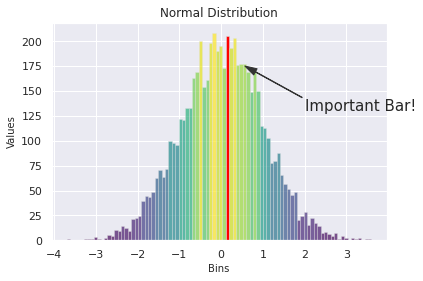

In [ ]:
n, bins, patches = plt.hist(x, bins=90, facecolor='#2ab0ff', edgecolor='#e0e0e0', linewidth=0.5, alpha=0.7)

n = n.astype('int') # it MUST be integer
# Good old loop. Choose colormap of your taste
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.viridis(n[i]/max(n)))
# Make one bin stand out   
patches[47].set_fc('red') # Set color
patches[47].set_alpha(1) # Set opacity
# Add annotation
plt.annotate('Important Bar!', xy=(0.57, 175), xytext=(2, 130), fontsize=15, arrowprops={'width':0.4,'headwidth':7,'color':'#333333'})
# Add title and labels with custom font sizes
plt.title('Normal Distribution', fontsize=12)
plt.xlabel('Bins', fontsize=10)
plt.ylabel('Values', fontsize=10)
show(plt)


In [ ]:
i=0
while (0.5>hist[i]):
  i=i+1

In [ ]:
print(i)

10


In [ ]:
dfImpute

NameError: ignored

In [ ]:
dfImputeID[dfImputeID["clientid"]==280065]

KeyError: ignored

In [ ]:
import numpy as np
from bokeh.io import show, output_notebook
from bokeh.plotting import figure
output_notebook()

data = np.random.normal(0, 0.5, 1000)
hist, edges = np.histogram(dfImputeID["EXT_SOURCE_1"], density=True, bins=50)

p = figure()
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="white")

show(p)

In [ ]:
dfImputeID["EXT_SOURCE_1"].min()

0.0145681324124455

In [ ]:
t=lm.predict_proba(X_test[:1])

In [ ]:
t[:,1][0]

0.35961223809871506

In [ ]:
c

0

In [ ]:
from bokeh.layouts import column
from bokeh.models import CustomJS, ColumnDataSource, Slider
from bokeh.models import TextInput
from bokeh.plotting import figure, show

from bokeh.io import curdoc
from bokeh.layouts import widgetbox, column
from bokeh.models import TextInput, Button

button = Button(button_type='success')
ti = TextInput(title='enter text to enable button')
layout = column(
    widgetbox(ti),
    widgetbox(button))

button.disabled = True

def callback(attr, old, new):
    if ti.value != '':
        button.disabled = False
    else:
        button.disabled = True

ti.on_change('value', callback)

curdoc().add_root(layout)
show(layout)

In [ ]:
from bokeh.io import curdoc
from bokeh.layouts import widgetbox, column
from bokeh.models import TextInput, Button

button = Button(button_type='success')
ti = TextInput(title='enter text to enable button')
layout = column(
    widgetbox(ti),
    widgetbox(button))

button.disabled = True

def callback(attr, old, new):
    if ti.value != '':
        button.label = "essai"
    else:
        button.label = "essai2"

ti.on_change('value_input', callback)

curdoc().add_root(layout)

show(layout)

/usr/local/lib/python3.7/dist-packages/bokeh/util/deprecation.py:75: BokehDeprecationWarning:

'WidgetBox' is deprecated and will be removed in Bokeh 3.0, use 'bokeh.models.Column' instead

/usr/local/lib/python3.7/dist-packages/bokeh/util/deprecation.py:75: BokehDeprecationWarning:

'WidgetBox' is deprecated and will be removed in Bokeh 3.0, use 'bokeh.models.Column' instead



In [ ]:
from bokeh.models import Button
from bokeh.io import curdoc


bt = Button(label='Click me')

def change_click():
    print('I was clicked')

bt.on_click(change_click)

curdoc().add_root(bt)

show(bt)

In [ ]:
bt = Button(label='Click me')

def callback(event):
    print('Python:I was clicked')

bt.on_event(ButtonClick, callback)

curdoc().add_root(bt)

show(bt)

#def callback(event):
    #print('Python:Click')

#button.on_event(ButtonClick, callback)/

In [ ]:

# importing show from bokeh.io
# to show the button
from bokeh.io import show
  
# importing button and customJS package
# from bokeh.models
from bokeh.models import Button, CustomJS
  
# Creating a button variable where
# we are specifying the properties of the
# button such as label on the button and
# the button type(Different color)
button = Button(label = "Click on the button",
                button_type = "danger", id='mybutton')
  
# js_on_click sets up a javascript handler
# for state changes and also when we 
# are clicking on the button. a message
# is printed on the console
#button.js_on_click(CustomJS(code = "console.log('button: You have clicked on the button!')"))
button.js_on_click(CustomJS(code = "mybutton.innerText='ok'"))
  
# showing the above button
show(button)

In [ ]:
# JavaScript code for the callback stored as a string
jscode = """
function normalPDF(x) {
    x.innerText='ok';
}
"""

In [ ]:
button = Button(label = "Click on the button",
                button_type = "danger")
args = dict(button=button)
button.on_click(value=jscode, args=args)
  
# js_on_click sets up a javascript handler
# for state changes and also when we 
# are clicking on the button. a message
# is printed on the console
#button.js_on_click(CustomJS(code = "console.log('button: You have clicked on the button!')"))

  
# showing the above button
show(button)

TypeError: ignored

In [ ]:
from bokeh.layouts import layout
from bokeh.models import Div, RangeSlider, Spinner
from bokeh.plotting import figure, show

# prepare some data
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [4, 5, 5, 7, 2, 6, 4, 9, 1, 3]

# create plot with circle glyphs
p = figure(x_range=(1, 9), width=500, height=250)
points = p.circle(x=x, y=y, size=30, fill_color="#21a7df")

# set up textarea (div)
div = Div(
    text="""
          <p>Select the circle's size using this control element:</p>
          """,
    width=200,
    height=30,
)

# set up spinner
spinner = Spinner(
    title="Circle size",
    low=0,
    high=60,
    step=5,
    value=points.glyph.size,
    width=200,
)
spinner.js_link("value", points.glyph, "size")

# set up RangeSlider
range_slider = RangeSlider(
    title="Adjust x-axis range",
    start=0,
    end=10,
    step=1,
    value=(p.x_range.start, p.x_range.end),
)
range_slider.js_link("value", p.x_range, "start", attr_selector=0)
range_slider.js_link("value", p.x_range, "end", attr_selector=1)

# create layout
layout = layout(
    [
        [div, spinner],
        [range_slider],
        [p],
    ]
)

# show result
show(layout)

In [ ]:
from bokeh.events import ButtonClick
from bokeh.models import Button

button = Button()

def callback(event):
    print('Python:Click')

button.on_event(ButtonClick, callback)
show(button)

In [ ]:
from flask import Flask

app = Flask(__name__)

@app.route('/')
def index():
    return "Hello world !"

if __name__ == "__main__":
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


In [ ]:
!pip install flask-ngrok
!pip install flask-bootstrap
!pip install pyngrok==4.1.1

In [ ]:
drive.mount('/content/gdrive/') #, force_remount=True)

Mounted at /content/gdrive/


In [ ]:
cd /content/gdrive/MyDrive

/content/gdrive/MyDrive


In [ ]:
!ngrok authtoken '28KQjWQFdHXWXhvglssySvttlqZ_6pwqDELgKqyxQo2rsh1V1'

SyntaxError: ignored

In [ ]:
from flask import Flask 
from flask_ngrok import run_with_ngrok 
app = Flask(__name__) 
#drive.mount('/content/gdrive')
run_with_ngrok(app)

#@app.route("/") 
#def home():
 #   return render_template('index.html')

#@app.route('/getprediction',methods=['POST'])
#def getprediction():    
 #   return render_template('test2.html')
   
def home(): 
    return "<h1>GFG is great platform to learn</h1>"
    
app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://9df9-34-139-56-25.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [26/Apr/2022 10:58:49] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [26/Apr/2022 10:58:49] "GET /favicon.ico HTTP/1.1" 404 -


In [ ]:
from flask_ngrok import run_with_ngrok
from flask import Flask, render_template , request 
import os
from google.colab import drive


!ngrok authtoken '28KQjWQFdHXWXhvglssySvttlqZ_6pwqDELgKqyxQo2rsh1V1'

drive.mount('/content/gdrive')
PEOPLE_FOLDER = os.path.join('static', 'people_photo')
app = Flask(__name__, template_folder='/content/static')
app.config['UPLOAD_FOLDER'] = PEOPLE_FOLDER
run_with_ngrok(app)
@app.route('/')
def home():
  full_filename = os.path.join(app.config['UPLOAD_FOLDER'], 'Shovon.jpg')
  return render_template('Webp.html',user_image = full_filename)
if __name__ == '__main__':
   app.run()

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://5c0a-34-139-56-25.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


[2022-04-26 11:04:04,850] ERROR in app: Exception on / [GET]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/usr/local/lib/python3.7/dist-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "<ipython-input-18-a129010e0ea3>", line 17, in home
    return render_template('Webp.html',user_image = ful

In [ ]:
from flask import Flask
from flask_ngrok import run_with_ngrok
app = Flask(__name__)
run_with_ngrok(app)   
  
@app.route("/test")
def home():
    return "&amp;amp;amp;amp;lt;h1>GFG is great platform to learn&amp;amp;amp;amp;lt;/h1>"
    
app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://7545-34-73-136-36.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


In [ ]:
x=dfImputeID[dfImputeID["ID"]==280065][["EXT_SOURCE_1"]].values[0][0]

In [ ]:
round(x,2)

0.46

In [ ]:
dfImputeID["EXT_SOURCE_1"].mean()

0.5265581670521486

In [ ]:
dfImputeID[dfImputeID["ID"]==280065].iloc[:, 10: 20]

,FLAG_WORK_PHONE,FLAG_PHONE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
155332,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.460212,0.312332,0.528093


In [ ]:
    data=dfImputeID["EXT_SOURCE_1"]
    cols = ['red','red','red','red', 'red','red','red','red','red', 'red']
    hist, edges = np.histogram(data, density=True, bins=10)
    clientvalue=dfImputeID[dfImputeID["ID"]==280065]["EXT_SOURCE_1"]
    i=0
    while (0.5>hist[i]):
        i=i+1
    cols[i]='navy'
 

In [ ]:
i=0
while (clientvalue.values[0]>edges[i]):
  i=i+1

In [ ]:
import plotly.graph_objects as go
import numpy as np

plot_bgcolor = "#def"
quadrant_colors = [plot_bgcolor, "#f25829", "#f2a529", "#eff229", "#85e043", "#2bad4e"] 
quadrant_text = ["", "<b>Very high</b>", "<b>High</b>", "<b>Medium</b>", "<b>Low</b>", "<b>Very low</b>"]
n_quadrants = len(quadrant_colors) - 1

current_value = 19
min_value = 0
max_value = 50
hand_length = np.sqrt(2) / 4
hand_angle = np.pi * (1 - (max(min_value, min(max_value, current_value)) - min_value) / (max_value - min_value))

fig = go.Figure(
    data=[
        go.Pie(
            values=[0.5] + (np.ones(n_quadrants) / 2 / n_quadrants).tolist(),
            rotation=90,
            hole=0.5,
            marker_colors=quadrant_colors,
            text=quadrant_text,
            textinfo="text",
            hoverinfo="skip",
        ),
    ],
    layout=go.Layout(
        showlegend=False,
        margin=dict(b=0,t=10,l=10,r=10),
        width=450,
        height=450,
        paper_bgcolor=plot_bgcolor,
        annotations=[
            go.layout.Annotation(
                text=f"<b>IOT sensot value:</b><br>{current_value} units",
                x=0.5, xanchor="center", xref="paper",
                y=0.25, yanchor="bottom", yref="paper",
                showarrow=False,
            )
        ],
        shapes=[
            go.layout.Shape(
                type="circle",
                x0=0.48, x1=0.52,
                y0=0.48, y1=0.52,
                fillcolor="#333",
                line_color="#333",
            ),
            go.layout.Shape(
                type="line",
                x0=0.5, x1=0.5 + hand_length * np.cos(hand_angle),
                y0=0.5, y1=0.5 + hand_length * np.sin(hand_angle),
                line=dict(color="#333", width=4)
            )
        ]
    )
)
fig.show()

In [ ]:
hand_angle

1.9477874452256718

In [ ]:
 "#85e043",

In [ ]:
import plotly.graph_objects as go
import numpy as np

plot_bgcolor = "#def"
quadrant_colors = [plot_bgcolor, "#f25829", "#f25829",  "#f2a529", "#eff229", "#2bad4e", ] 
quadrant_text = [ "", "<b>PAS DE CREDIT</b>","", "<b>GROS RISQUE</b>", "<b>FAIBLE RISQUE</b>", "<b>SANS RISQUE</b>"]
n_quadrants = len(quadrant_colors) - 1

current_value = 40
min_value = 0
max_value = 50
hand_length = np.sqrt(2) / 4
hand_angle = np.pi * (1 - (max(min_value, min(max_value, current_value)) - min_value) / (max_value - min_value))

fig = go.Figure(
    data=[
        go.Pie(
            values=[0.5] + (np.ones(n_quadrants) / 2 / n_quadrants).tolist(),
            rotation=90,
            hole=0.5,
            marker_colors=quadrant_colors,
            text=quadrant_text,
            textinfo="text",
            hoverinfo="skip",
        ),
    ],
    layout=go.Layout(
        showlegend=False,
        margin=dict(b=0,t=10,l=10,r=10),
        width=450,
        height=450,
        paper_bgcolor=plot_bgcolor,
        annotations=[
            go.layout.Annotation(
                text=f"<b>RISQUE CREDIT</b>",
                x=0.5, xanchor="center", xref="paper",
                y=0.25, yanchor="bottom", yref="paper",
                showarrow=False,
            )
        ],
        shapes=[
            go.layout.Shape(
                type="circle",
                x0=0.48, x1=0.52,
                y0=0.48, y1=0.52,
                fillcolor="#333",
                line_color="#333",
            ),
            go.layout.Shape(
                type="line",
                x0=0.5, x1=0.5 + hand_length * np.cos(hand_angle),
                y0=0.5, y1=0.5 + hand_length * np.sin(hand_angle),
                line=dict(color="#333", width=4)
            )
        ]
    )
)
fig.update_layout(
    autosize=False,
    width=450,
    height=250,
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0,
        pad=4
    )
)
fig.show()

In [ ]:
from bokeh.layouts import layout
from bokeh.models import Div, RangeSlider, Spinner
from bokeh.plotting import figure, show

p=figure()
show(p)

In [ ]:
int(0.1213152*100/2)

6

In [ ]:
model=LoadPickle("model")

In [ ]:
test=LoadPickle("dfImpute")

In [ ]:
from sklearn.metrics import make_scorer, fbeta_score

In [ ]:
y_pred=np.around(model.predict(test.drop(['TARGET'], axis=1)))
#print(classification_report(y_test, y_pred))

In [ ]:
fbeta_score(test["TARGET"], y_pred, beta=0.5)

0.18754786097813286

In [ ]:
fbeta_score(test["TARGET"], y_pred, beta=2)

0.4051975192778428

In [ ]:
fbeta_score(test["TARGET"], y_pred, beta=1)

0.256413396191759

In [ ]:
from lime.lime_tabular import LimeTabularExplainer

In [ ]:

explainer = LimeTabularExplainer(X_train,
    feature_names=boston.feature_names,
    class_names=['price'],
    categorical_features=categorical_features,
    mode='regression')

# Now explain a prediction
exp = explainer.explain_instance(X_test[25], regressor.predict,
        num_features=10)

exp.as_pyplot_figure()
from matplotlib import pyplot as plt
plt.tight_layout()

In [ ]:
from lime.lime_tabular import LimeTabularExplainer
explainer = lime.lime_tabular.LimeTabularExplainer(df_titanic[model.feature_name()].astype(int).values,  
mode='classification',training_labels=df_titanic['Survived'],feature_names=model.feature_name())


# asking for explanation for LIME model
i = 1
exp = explainer.explain_instance(df_titanic.loc[i,feat].astype(int).values, prob, num_features=5)



In [ ]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 275 kB 5.6 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=846d93d7afe4bd059a9b3a007b71d1bb21fd52f90a7fff3dc6119334661a1916
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [ ]:

idx = random.randint(1, len(X_test))
explainer = LimeTabularExplainer(X_train, mode="regression", feature_names= features)
explanation = explainer.explain_instance(X_test[idx], model.predict, num_features=len(features))
with plt.style.context("ggplot"):
    explanation.as_pyplot_figure()

TypeError: ignored

In [ ]:
y = test["TARGET"]
X = test.drop(['TARGET'], axis=1)
#X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                                  test_size=0.33, 
                                                  random_state=42)


oversample = SMOTE()
X, y = oversample.fit_resample(X_train, y_train)

In [ ]:
 features =  list(X_train.keys())[::-1]

In [ ]:
labels=features
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                                  test_size=0.33, 
                                                  random_state=42)

X_train, X_test, y_train, y_test = train_test_split(current_data, labels, random_state=42) 


def get_lime_explainer(model, data, labels):  

  cat_feat_ix = [i for i,c in enumerate(data.columns) if pd.api.types.is_categorical_dtype(data[c])]
  feat_names = list(data.columns)
  class_names = list(labels.unique())
  scaler = model["model"]["scaler"]
  data = scaler.transform(data) # scale data to reflect train time scaling
  lime_explainer = LimeTabularExplainer(data,
                                      feature_names=feat_names,
                                      class_names=class_names,
                                      categorical_features=cat_feat_ix ,
                                      mode="classification"
                                      )
  return lime_explainer

def lime_explain(explainer, data, predict_method, num_features): 
  explanation = explainer.explain_instance(data, predict_method, num_features=num_features) 
  return explanation

lime_data_explainations = []
lime_metrics = []
lime_explanation_time = []
feat_names = list(current_data.columns)
test_data_index = 6
for current_model in trained_models:  
  scaler = current_model["model"]["scaler"]
  scaled_test_data = scaler.transform(X_test)
  predict_method = current_model["model"]["clf"].predict_proba 

  start_time = time.time()
  # explain first sample from test data
  lime_explainer = get_lime_explainer(current_model, X_train, y_train)
  explanation = lime_explain(lime_explainer, scaled_test_data[test_data_index], predict_method, top_x) 
  elapsed_time = time.time() - start_time 

  ex_holder = {}
  for feat_index,ex in explanation.as_map()[1] :
    ex_holder[feat_names[feat_index]] = ex
  
  lime_data_explainations.append(ex_holder) 
  actual_pred = predict_method(scaled_test_data[test_data_index].reshape(1,-1))
  perc_pred_diff =  abs(actual_pred[0][1] - explanation.local_pred[0])   
  lime_explanation_time.append({"time": elapsed_time, "model": current_model["name"] })
  lime_metrics.append({"lime class1": explanation.local_pred[0], "actual class1": actual_pred[0][1], "class_diff": round(perc_pred_diff,3), "model": current_model["name"] })
  # break 

In [ ]:
def plot_lime_exp(fig, fig_index, exp_data, title):
  features =  list(exp_data.keys())[::-1]
  explanations = list(exp_data.values())[::-1]
  ax = fig.add_subplot(fig_index) 
  lime_bar = ax.barh( features, explanations ) 
  ax.set_title(title, fontsize = 20)
  for i,bar in enumerate(lime_bar):
    bar.set_color(color_list[list(current_data.columns).index(features[i])])
    plt.box(False) 
fig = plt.figure(figsize=(19,8))

# Plot lime explanations for trained models
for i, dex in enumerate(lime_data_explainations):
  fig_index = "23" + str(i+1)
  plot_lime_exp(fig, fig_index, lime_data_explainations[i], trained_models[i]["name"])

plt.suptitle( " LIME Explanation for single test data instance.  Top " + str(top_x) + " Features", fontsize=20, fontweight="normal")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# Plot run time for explanations
lx_df = pd.DataFrame(lime_explanation_time)
lx_df.sort_values("time", inplace=True)
setup_plot()
lx_ax = lx_df.plot(kind="line", x="model", title="Runtime (seconds) for single test data instance LIME explanation", figsize=(22,6))
lx_ax.title.set_size(20)
lx_ax.legend(["Run time"])
plt.box(False)

In [ ]:
features=X.columns

explainer = LimeTabularExplainer(np.array(X_train),feature_names=features,class_names=['quality'],verbose=True, mode='regression')



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


Intercept 0.348985476200777
Prediction_local [0.32386963]
Right: 0.0


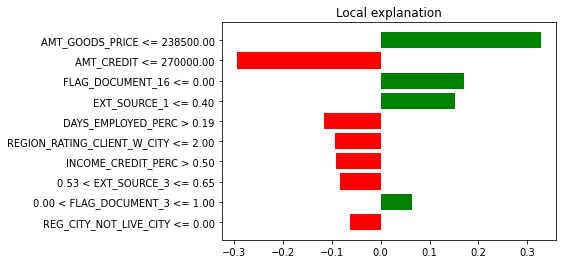

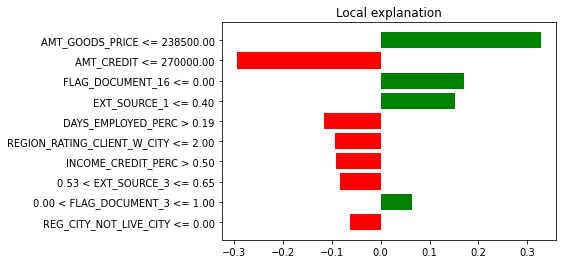

In [ ]:
exp = explainer.explain_instance(X_test.iloc[0], 
     model.predict, num_features=10)
exp.as_pyplot_figure()